In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
#for import stock data
%pip install pandas_datareader
import pandas_datareader as pdr

Note: you may need to restart the kernel to use updated packages.


In [3]:
from datetime import datetime

In [4]:
techlist=['AAPL','GOOG', 'MSFT', 'AMZN']# Create a dataframe for every company

In [5]:
#to maintain same values in some explanations, use this end=datetime(2020,5,23)
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)

In [6]:
for stock in techlist:
    globals()[stock]=pdr.DataReader(stock,'yahoo',start,end)
#create a global variable

In [7]:
globals()['XYZ']=6
XYZ

6

In [8]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-23,180.539993,177.809998,179.800003,179.660004,36529700.0,177.541138
2019-05-24,182.139999,178.619995,180.199997,178.970001,23714700.0,176.859283
2019-05-28,180.589996,177.910004,178.919998,178.229996,27948200.0,176.128006
2019-05-29,179.350006,176.000000,176.419998,177.380005,28481200.0,175.288025
2019-05-30,179.229996,176.669998,177.949997,178.300003,21218400.0,176.197189


In [9]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,254.262885,248.551937,251.023754,251.647035,3.350514e+07,250.157449
std,43.890937,42.664626,43.099978,43.523144,1.718792e+07,43.973619
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.256134
25%,210.639999,207.289993,208.889999,208.970001,2.184720e+07,207.207077
50%,257.850006,248.000000,250.750000,254.289993,2.843260e+07,253.603500
75%,289.980011,282.920013,284.820007,288.079987,3.813280e+07,287.302277
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,326.316681


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-05-23 to 2020-05-22
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


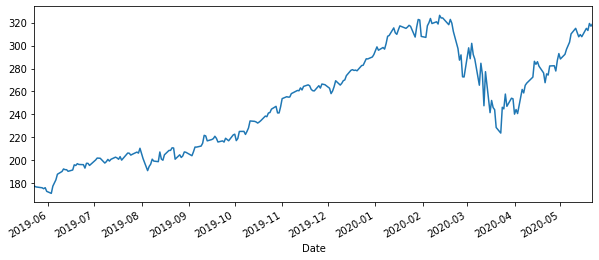

In [11]:
AAPL['Adj Close'].plot(figsize=(10,4))

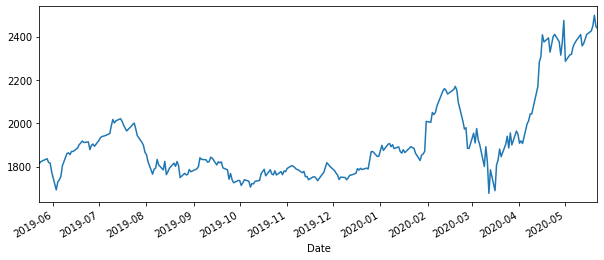

In [12]:
AMZN['Adj Close'].plot(figsize=(10,4))

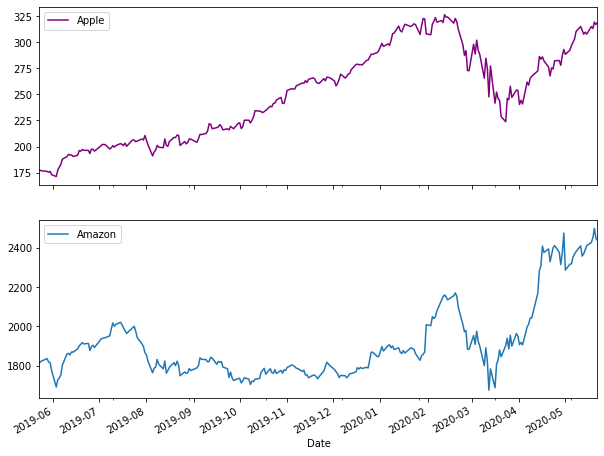

In [13]:
fig, axes = plt.subplots(nrows=2, sharex=True,figsize=(10,8))

AAPL['Adj Close'].plot(ax=axes[0],color='purple',label='Apple')

AMZN['Adj Close'].plot(ax=axes[1],label='Amazon')
axes[1].legend()
axes[0].legend()

In [14]:
#calc moving average
mav=[10,20,50]

for dfs in [AAPL,GOOG,MSFT,AMZN]:
    for ma in mav:
        colname= f'{ma} MA'
        dfs[colname]=dfs['Adj Close'].rolling(ma,axis=0).mean()
#Moving Average

In [15]:
#selecting a range of columns
AAPL[AAPL.columns[5:]]

,Adj Close,10 MA,20 MA,50 MA
Date,,,,
2019-05-23,177.541138,NaN,NaN,NaN
2019-05-24,176.859283,NaN,NaN,NaN
2019-05-28,176.128006,NaN,NaN,NaN
2019-05-29,175.288025,NaN,NaN,NaN
2019-05-30,176.197189,NaN,NaN,NaN
...,...,...,...,...
2020-05-18,314.959991,307.590506,294.812523,273.011395
2020-05-19,313.140015,309.228839,297.087250,273.965167
2020-05-20,319.230011,311.170001,299.281020,274.658373


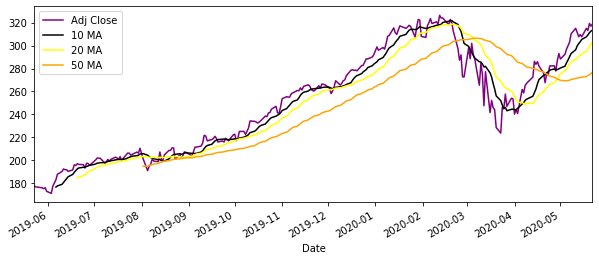

In [16]:
AAPL[AAPL.columns[5:]].plot(subplots=False,figsize=(10,4),color=['purple','black','yellow','orange'])

In [17]:
AAPL['DailyReturn']=AAPL['Adj Close'].pct_change()

In [18]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,10 MA,20 MA,50 MA,DailyReturn
Date,,,,,,,,,,
2019-05-23,180.539993,177.809998,179.800003,179.660004,36529700.0,177.541138,NaN,NaN,NaN,NaN
2019-05-24,182.139999,178.619995,180.199997,178.970001,23714700.0,176.859283,NaN,NaN,NaN,-0.003841
2019-05-28,180.589996,177.910004,178.919998,178.229996,27948200.0,176.128006,NaN,NaN,NaN,-0.004135
2019-05-29,179.350006,176.000000,176.419998,177.380005,28481200.0,175.288025,NaN,NaN,NaN,-0.004769
2019-05-30,179.229996,176.669998,177.949997,178.300003,21218400.0,176.197189,NaN,NaN,NaN,0.005187


(-0.11, 0.11)

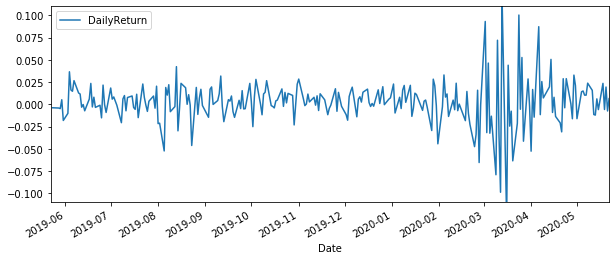

In [19]:
AAPL['DailyReturn'].plot(figsize=(10,4),legend=True)
plt.ylim((-.11,.11))

In [20]:
sns.set_style('whitegrid')

(-0.11, 0.11)

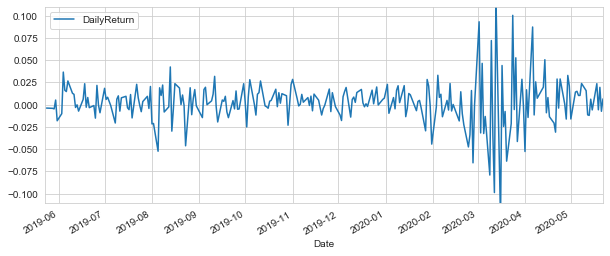

In [21]:
#changing style
AAPL['DailyReturn'].plot(figsize=(10,4),legend=True)
plt.ylim((-.11,.11))

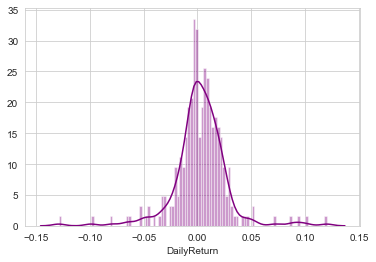

In [22]:
#sns Kde plot
sns.distplot(AAPL['DailyReturn'].dropna(),color='purple',bins=100)

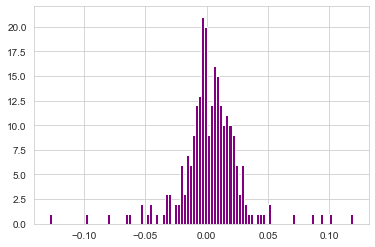

In [23]:
#without sns plot
AAPL['DailyReturn'].hist(color='purple',bins=100)

In [24]:
adj_close_df= pdr.DataReader(techlist,'yahoo',start,end)['Adj Close']

In [31]:
adj_close_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-23,177.541138,1140.770020,124.646194,1815.479980
2019-05-24,176.859283,1133.469971,124.705452,1823.280029
2019-05-28,176.128006,1134.150024,124.626442,1836.430054
2019-05-29,175.288025,1116.459961,123.421265,1819.189941
2019-05-30,176.197189,1117.949951,124.201653,1816.319946


In [36]:
rets=adj_close_df.pct_change()

In [37]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-23,NaN,NaN,NaN,NaN
2019-05-24,-0.003841,-0.006399,0.000475,0.004296
2019-05-28,-0.004135,0.000600,-0.000634,0.007212
2019-05-29,-0.004769,-0.015598,-0.009670,-0.009388
2019-05-30,0.005187,0.001335,0.006323,-0.001578


In [47]:
import scipy.stats as stats

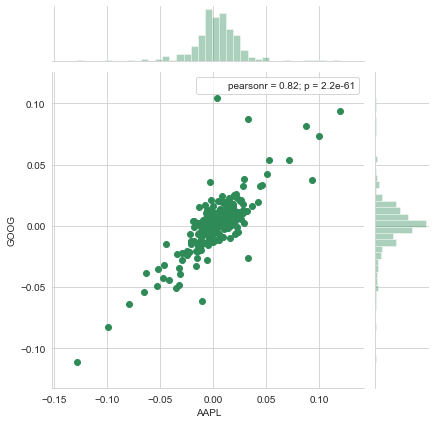

In [58]:
p=sns.jointplot('AAPL','GOOG',data=rets, annot_kws=stats.pearsonr,color='seagreen')
p.annotate(stats.pearsonr)

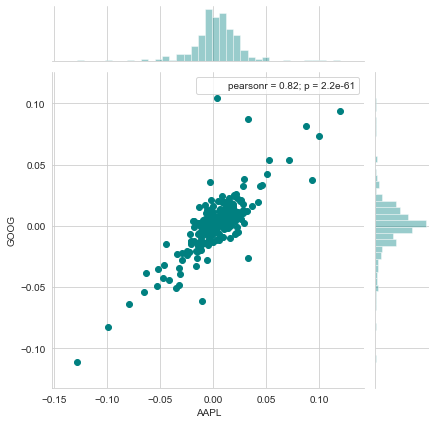

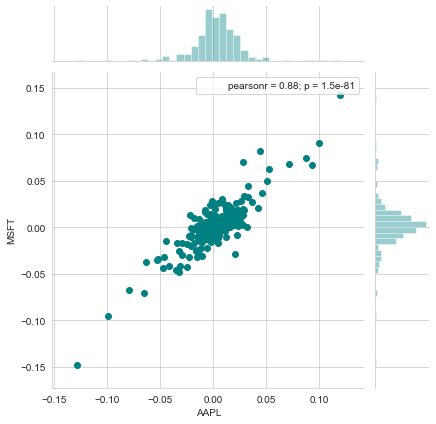

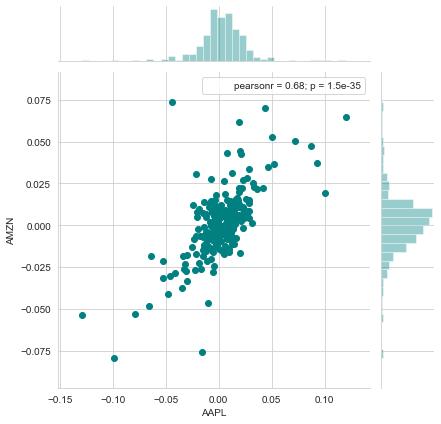

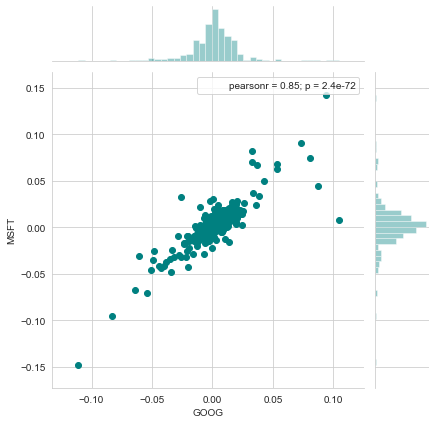

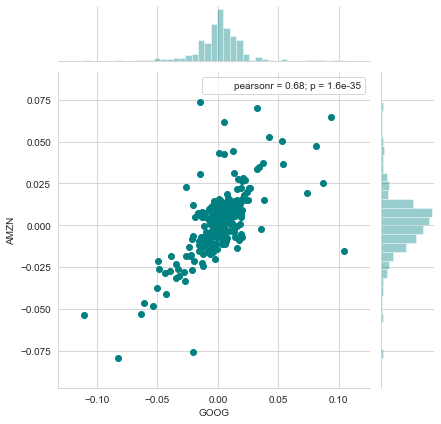

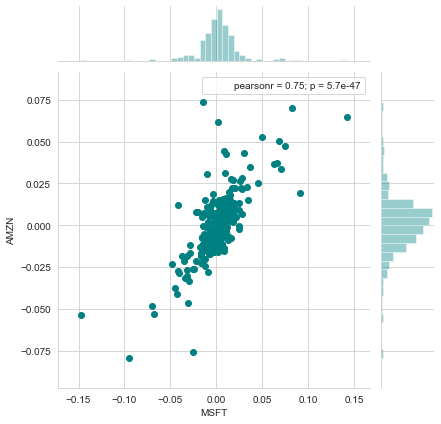

In [67]:
for i in range(len(techlist)):
    for j in range(len(techlist)):
        if j>i:
            p=sns.jointplot(techlist[i],techlist[j],data=rets, annot_kws=stats.pearsonr,color='teal')
            p.annotate(stats.pearsonr)

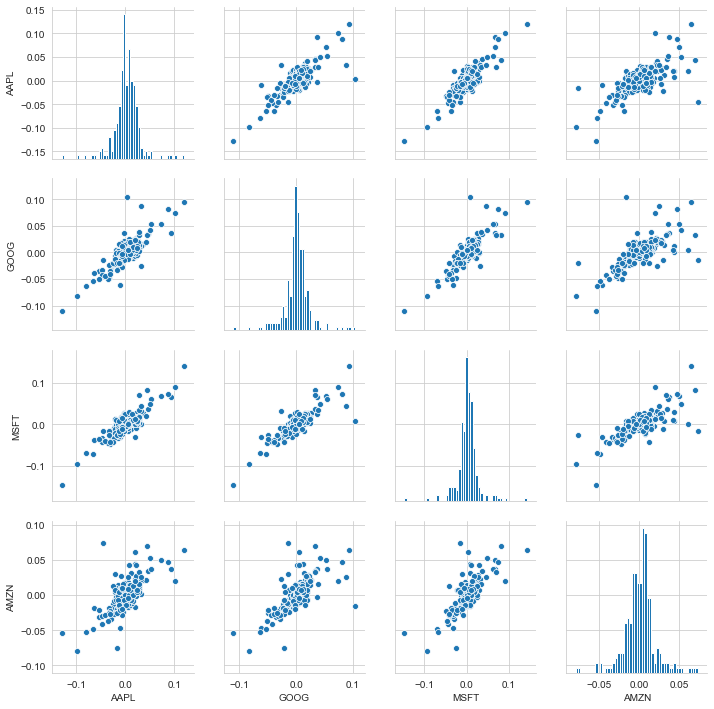

In [75]:
#comparison between every companies can be acheived using pairplot
sns.pairplot(rets.dropna(),diag_kws={'bins':50})

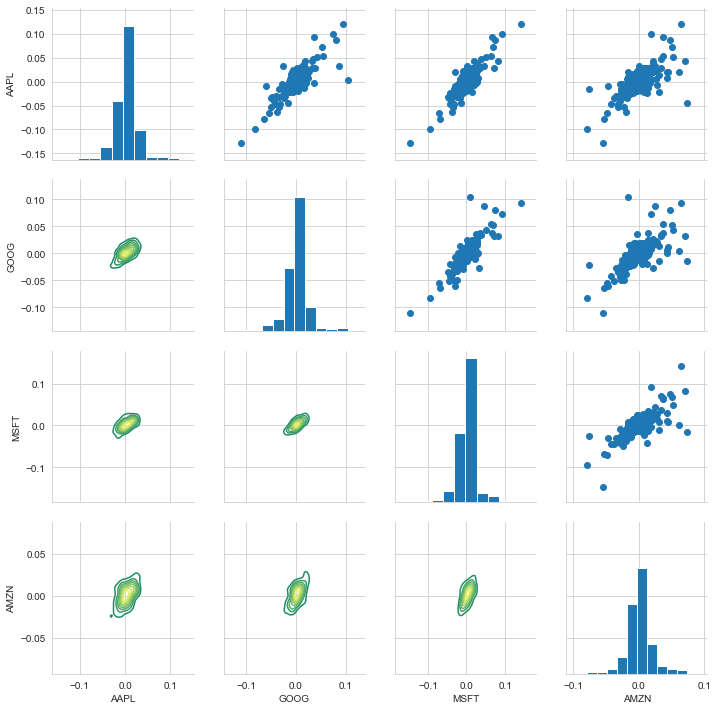

In [83]:
#if you want more control over pairplot, we use pairgrid
pairgrid=sns.PairGrid(rets.dropna())
pairgrid.map_upper(plt.scatter)
pairgrid.map_lower(sns.kdeplot,cmap='summer')
pairgrid.map_diag(plt.hist)

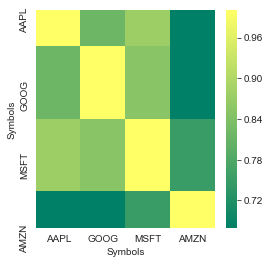

In [95]:
#correlation plot
f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(rets.corr(),cdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAs4AAALGCAYAAABVvxdBAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzdf3wTZb4v8E+SpmnatKSForRbUFhbu1CkhVUUYQ+ylV1h3V4UKJWurgt62IW7slhFFl1ELnRlUS8vxXO9elkOChbErT/YPewiHKoIera2YkvoQRDQ+INCKW3TJP2R3D9qYtPOpJM0M5kkn/fr5Us6STrPTL55+s0z33kejdvtdoOIiIiIiPzShrsBRERERESRgIkzEREREZEETJyJiIiIiCRg4kxEREREJAETZyIiIiIiCZg4ExERERFJEKfUjlwuF9asWYOGhgbEx8dj3bp1GDVqlM9zmpqaUFxcjLfeegsGgwFutxvTpk3DVVddBQCYMGECVqxYoVSTiYiIiIi8FBtx3r9/Pzo6OlBRUYEVK1agvLzc5/F3330X9957Ly5cuODddu7cOYwdOxbbt2/H9u3bJSXNJ0+eDHnb/Tlz5oyi+wsFtlk95IrXaDlfPA71ULpvFaLW86jWdgHqbptc/MVqLJ4PITwPwZ8DxRLn6upqTJ06FUDPyHFdXZ1vQ7RabN26FWaz2butvr4e33zzDUpLS7F48WKcPn16wP10dXWFtuEDsNvtiu4vFNhm9ZArXqPlfPE41EPpvlWIWs+jWtsFqLttcvEXq7F4PoTwPAR/DhQr1Whra4PJZPL+rNPp0NXVhbi4niZMmTKl32vS09Nx33334ac//Sn++c9/oqysDHv27PG7H6fTCYvFEtrG++FwOBTdXyiwzf3l5ubK9rv9kSteI/E9FsLj6C/aYjUQao0HtbYLCG/b1Biran6vlMTz4HsOAolVxRJnk8kEm83m/dnlcnmTZjHjxo2DTqcDAEyaNAnffPMN3G43NBqN6GsMBoOiH1aLxRK2ziFYbLN6yBWv0XK+eBzqoXTfKkSt51Gt7QLU3Ta5+IvVWDwfQngegj8HipVqFBQUoKqqCgBQW1uL7OzsAV/z7LPPYtu2bQCAEydOICMjw2/STEREREQkF8VGnAsLC3H48GEUFxfD7XZj/fr12Lp1K0aOHIkZM2YIvua+++5DWVkZDh06BJ1Ohw0bNijVXCIiIiIiH4olzlqtFmvXrvXZNmbMmH7PO3DggPffQ4YMwQsvvCB724iIiIiIBsIFUIiIiIiIJGDiTEREREQkARNnIiIiIiIJmDgTEREREUnAxJmIiIiISAImzkREREREEig2HR0RUSyorLFi474GfNlsR4bZiLKZOchJCHeriAIjFMdF+ZnhbhbFCDXHH0eciYhCpLLGikde/wTWZjvcAKzNdjzy+ic4cLo13E0jkkwsjitrrOFuGsUAtccfE2ciohDZuK8B9s5un232zm5s++hSmFpEFDixON64ryFMLaJYovb4Y+JMRBQiXzbbBbc32roUbglR8MTiWGw7USipPf6YOBMRhUiG2Si4PT2Jt5NQ5BCLY7HtRKGk9vhj4hxDHN9e+sjNzZX8XCKSrmxmDox6nc82o16HuwtSw9QiosCJxXHZzJwwtYhiidrjj8MgMSRBr8NVK/dKeu6Z8lkyt4Yo+nju+u4/q0ZLmFtGJJ1YHKtlVgOKbmqPPybOREQhVJSf2a+Dt1iYOFNkEYpjIqWoOf5YqkFEREREJAETZyIiIiIiCRQr1XC5XFizZg0aGhoQHx+PdevWYdSoUT7PaWpqQnFxMd566y0YDAY4HA6UlZXh4sWLSEpKwh//+EekpaUp1WQiIi81r2RFBHDVSgo99nv9KTbivH//fnR0dKCiogIrVqxAeXm5z+Pvvvsu7r33Xly4cMG7befOncjOzsaOHTtQVFSELVu2KNVcIiIvta9kRcRVKynU2O8JUyxxrq6uxtSpUwEAEyZMQF1dnW9DtFps3boVZrNZ8DXTpk3DkSNHlGouEZGX2leyIuKqlRRq7PeEKVaq0dbWBpPJ5P1Zp9Ohq6sLcXE9TZgyZYrga5KTkwEASUlJaG0d+Juz0+mExWIJUasH5nA4FN3fYEiZv7k3NR2X3Oc50HMTKnLFayTFpT+DPY4Dp1ux7aNLaLR1IT0pDncXpOKW0ckB/x5/K1lJaV8o349oi9VAqDWu5W6XlDj2t2pluM6ZGmNVrTGkNCnnIZh+L1R9rhJ6n4NAYlWxxNlkMsFms3l/drlc3qRZymtsNhtSUlIG3I/BYFD0w2qxWMLWOchNTccVredZrniNlvM1mOOorLHi2aNnvSMm521dePZoEzIzAp/mKMP8FawCf0QyzEZJ7YuG90PpvlWIWs+jnO2SGsdiMZqeFKfKcyYnf7Gq1hhSmpTzEGi/F8o+VwnBxoJipRoFBQWoqqoCANTW1iI7O1vSaw4dOgQAqKqqwsSJE2VtIxFFj1BeZlT7SlYUvaTGMVetpFALtN+LldIOxRLnwsJCxMfHo7i4GBs2bMAjjzyCrVu34p133hF9zYIFC3Dy5EksWLAAFRUVWLp0qVLNJaII5+8yY6CK8jOxYU4eMs1GaACYjXok6LVYXlGLKeUHYv5mGZKPWLxam+0+sdc3RjPNRmyYk6fay+SkfmIxJTZ6PFCfW1ljxZTyA7h65d6I7jcVK9XQarVYu3atz7YxY8b0e96BAwe8/zYajdi8ebPsbSOi6JNhNopeZgyGZyUrz53mnpEVz53mnucQhZJYHAP9Y4+rVlKoBbKCn78+N5r6TS6AQkRRSa7yili5HEnqIBTHvTH2SC389bnR1G8ycSaiqBToZUapQlkCQjSQ3nEshrFHauCvz42mflOxUg0iIqUFcplRqlCXgBANxBPHU8oPMPZI1cT63GjqNzniTEQUAM6wQeHC2KNIFU2xyxFnIqIAeEZTNu5rwJfNdmSYjSibmRNxN7hQ5GHsUaSKpthl4kxEMauyxhpURy5HCQiRP31j9en5ExiDFFF6z0y0cV8DllfUYuO+hohLoJk4E1FMiqbpkSi6MVYpWkRDLLPGmYhiUjRNj0TRjbFK0SIaYpmJMxHFpGiaHomiG2OVokU0xDITZyKKSWLTIEXi9EgU3RirFC2iIZaZOBNRTIqm6ZEoujFWKVpEQyzz5kAiiknRND0SRTfGKkWLaIhlJs5EFLM4rRxFCsYqRYtIj2WWahARERERScARZyKKacEugkKkBMYnRZJYiFcmzkQUE4Q6dAARPxk/RY++MTr92nTsqbYyPikiBLK4SSQn2Iomzi6XC2vWrEFDQwPi4+Oxbt06jBo1yvv4rl278OqrryIuLg5LlizB9OnT0dzcjJkzZyI7OxsA8OMf/xh33323ks0moggn1qEb4rSik/FHSidO0UEoRl85eg7uPs9jfJJa+VvcpHe8RvrqgYomzvv370dHRwcqKipQW1uL8vJyPP/88wCAxsZGbN++HXv27IHT6URJSQmmTJmC48ePY/bs2Xj00UeVbCoRRbjeIxpajQbdbt8UxN7Z3a+T94ikyfgpMvUdcWvv6OoXj32TZg/GJ6lNZY0VVomLm0hNsNVK0cS5uroaU6dOBQBMmDABdXV13seOHTuG/Px8xMfHIz4+HiNHjsSJEydQV1eH+vp6LFy4EGlpaVi9ejWGDx+uZLOJKML0HdHomzQPJJIm46fIIzTiFgjGJ6mJJ57F9I3XSF89UNHEua2tDSaTyfuzTqdDV1cX4uLi0NbWhuTkZO9jSUlJaGtrw+jRozFu3DjcdNNNePPNN7Fu3Tps3rxZdB9OpxMWi0XW4+jN4XAour/ByM3NDej5ajouuc9zoOcmVOSK10iKS3/8HceB063Y9tElNNq6kJ4Uh7sLUnHL6J4+5NG/fAZ758DJcopBC2eXG87u755r0GlQkmcK6fkL5fsRbbEaCLXGtVi7xGJ0/dvnRK92DKR3fPr7DAzUNiWoMVbVGkNKC/Q8+Is1f/Es1J+mJ8XhvK2r33PTk+KC6u+D1fscBBKriibOJpMJNpvN+7PL5UJcXJzgYzabDcnJyRg/fjyMxp5vK4WFhX6TZgAwGAyKflgtFkvYOge5qem4ovU8yxWv0XK+xI6jssaKZ4+e9XbW521dePZoEzIzei7ztXYMnDQb9TqsLcoDIP9k/NHwfijdtwpR63kUape/GG0USBqEGPU63DExEwdPNPaLT3+/v3f8qvWcyclfrMbi+RASyHkYKNYabadFX/vHO6/r15+ump3ic8UF6In1VbPHITe3f98rNdYDFWwsKJo4FxQU4ODBg7jttttQW1vrveEPAMaPH49nnnkGTqcTHR0dOHXqFLKzs/Hwww/j1ltvxW233YYjR45g7NixSjaZiFTIX42cPzqNBi63u1+CHAl1dRRZ/MVohtkoWJ5hNuqRZIiT9CUu0utEKXIMFGti8ZxpNgrGYqCrB6ot1hVNnAsLC3H48GEUFxfD7XZj/fr12Lp1K0aOHIkZM2agtLQUJSUlcLvdWL58OQwGA1asWIFVq1Zh586dMBqNWLdunZJNJiIVknoTSl+b5vUf/SCSg1gsWpvtMBv10Os06OxVImTU67Dm9rGS4zPS60QpcgwUa2UzcwRHkD1TfgoJZPVAtcW6oomzVqvF2rVrfbaNGTPG++958+Zh3rx5Po9nZWVh+/btirSPiNSvssYKDYRnHPDchCKUWKcm6pk0k2LERuEAoNneCb1Wg9REPZrbO4MqERL7/bxxkELNnKjHpfZOwe1A4CPIgVJbrHMBFCKSVSgnuq+ssWLFro8Fk2YNILioCdAz+vGHn8lT5hXJE/nT4FXWWLH+7XNotJ32ef+FRuF663S50WLvwtPzJwDoSTqWV9RKjqFgRvmIfPurryTFmtikRM32TlTWWL2jx3L1e2qLdSbORCSbUE507/ldYlPLufv8TiWS2UifyJ8GR8r7v3Ffg+jIc7fbjbLdHwMaeMs2pMaQ3KN8FH2C7a+a7f1Hm4GehFqJ/k5tsc7EmYhkM5ibOvqO5DXZnLB3ukSfbzbqBbfbnF14/K36gEbzpFLbTSukLLH3f82b9X4T5t46Xf2/CIrFkNDVjcMrbxncQVDMEIvX5RW1WF5RCzd6rtzpdRp0fPtFLjVRL1oa53m956ZsORNbOUe0A8XEmYhkE+xNHcEsENFs78Rd//cI5k4a6fPa3qMloR4RVttNK6QsfzXMYqN0UvWNIV7doMES65fcff7d0eumVaHa5r6szXaUvfZxwFdNIpU23A0gougldvOG0PbKGiumlB/A1Sv3YsWuj4NaIOLwqSasev2Y39dKmbZOqkCOj6KPTqOR7Xf3jaFgp2Ak8pCzX+o9QwwQ3bHJxJmIZFM2MwdGvc5nm9BNHZU1VpS99jGszXa4EfgS2b21+ynn8AjViLDU46Po0fsL3mDi1B+hGOLVDRqMyhor2jukLbwTKtEamyzVICLZSL2p4/d/+aTfiIWcQjXyorabVmjw/M2S0rdcIpTEFufxUNuUXKQeA83sI2fc+pNhNqKyxorH36r3lnyYjXq/85VHwixFTJyJSFYD3dRRWWOFrUO5Dj3UI8JqummFBmegOmKhcolQMOp12DAnz28cqW1KLlIHqTO7KJ00G/U6TL823af2Geip/y/b/bFP+zwipY6fpRpEFFaPv1Uv6+83G/XeO8MzzcYBExSKXQPVEctx6VlqTBblZ2LDnDxkmo2MZfLyN7OLp6RIys3VodC3nz14olHwSmKnyy1Y/xwpdfwBjzjb7XYYjbw0RESDV1ljlXTXdrAyzUZO10WSDVRH7G81wGAEGp+8ukF9icVsKGZ2CVRifBz+8LPvyjCWV9SKPleo3ZFSxx/wiHNpaakc7SCiGCT3SAIvY1MgBpolZfq16QjVPBp6rYbxSYOmphp3T2lFZY0VgP+2CT0WKbMUBZw4u2W6i5iIYo+cIwlTxqRxdI4C4m+WlMoaK/ZUW0UXggiUKSGO8UmDVjYzB3qdfNMiBqp3aYVY28S+NEbKLEUBJ84aGeetJKLYMkRktb/B0muBVxbfKMvvpujlr4441DdYXWrv9I7MEQ1Gt4IzEgE99408M3+C6NUXz4BIUX4m5v8wC9peTzTqtdg49zrBL42RUscvWuO8adOmfkmy2+3GN998I3ujiCg22Jwy1eBpNKissaquwyX1E6ojrqyxynKDlRpnDKDIsubNegw8c31oeKaSA3rK7MTSdU9phecqje+q8v4HXyOhjl80cR49erTg9t/97neyNYaIYkdljRUS1ioJSmd3z13baumAD5xuxaI3Dqh6blIS5pkiSw6ey9qMBQpGZY1V0RsAvVPJafqvFOjRu7TC3ywZkRzzoonz7bffjqqqKiQmJuKGG25Qsk1EFAPknoZOLXdiV9ZYsfn9C3B++4dGrXOTkjC558BVS5xS5AnHNG2dLvGykMw+gwKRMktGoEQT58cffxytra1ob29HfX097r333kHvzOVyYc2aNWhoaEB8fDzWrVuHUaNGeR/ftWsXXn31VcTFxWHJkiWYPn06mpqa8OCDD8LhcGD48OHYsGEDp8MjigJyTkMHqOdO7I37GrxJs0c0jLrECrn/yKslTinyqCkB1QD9plaM1tUuRW8O/PTTT/H000/j2WefRVVVVUh2tn//fnR0dKCiogIrVqxAeXm597HGxkZs374dr776Kl566SU89dRT6OjowJYtWzB79mzs2LEDP/jBD1BRURGSthBR+Mh9U1TvmRA8iwBMKT8QlpuxonXUJVbI/UdebTMGUORQUwIq1JZImSUjUKIjznFxPQ/p9Xq4XKEpRKyursbUqVMBABMmTEBdXZ33sWPHjiE/Px/x8fGIj4/HyJEjceLECVRXV+P+++8HAEybNg1PPfUU7rnnnpC0h4jkVVljxcZ9Df1qe1e9fky2fSbqtVg/Jw8AVLF8a7SOusSCyhorLtmcsv1+o17Lqw40IE8/am22Q6fRoNvtRqbZiOnXpuPlo+cUbYsWgE6n8alxFkuGey/5HU33dwS8cuBgtLW1wWQyeX/W6XTo6upCXFwc2trakJyc7H0sKSkJbW1tPtuTkpLQ2trqdx9OpxMWi0WeAxDgcDgU3d9g5ObmBvR8NR2X3Oc50HMTKnLFqxri8sDp1n61vQ+/9jH+UXsK7XLdFQjAFK9FTkIL7n7tnOCNKevfrkNOQots+++rJM+Eze87fMo1DDoNSvJMQb1H0RargVAyrvvGrxwcnS7ZjyecfYEaY1UNfWMg+sZht/u7/lTppBkATAYt7r9+KP7tgwto7ehpi17rhvVLKywC/WpOAvDiz0f02tICi0W5/tef3rEQSKyKJs4fffQRbr75ZgBAc3Oz998A8N577wXVSJPJBJvN5v3Z5XJ5R7b7Pmaz2ZCcnOzdnpCQAJvNhpSUFL/7MBgMin5YLRZL2DoHuanpuKL1PMsVr6E6X2IjxlIseuNAv6TD2e3Gf/x326Db5U+jrQu5ublotJ32+7hSenb1IXZ80hbRoy5K961ClOgHeo/uyS3DbJT9eKK17/THX6yq4XwE0q8K9aPh1Op0ITMjE13uJgA9AxMtTheePdqEzAz1TyXXW7CxIJo49y6j6O3rr78OeCceBQUFOHjwIG677TbU1tYiOzvb+9j48ePxzDPPwOl0oqOjA6dOnUJ2djYKCgpw6NAhzJkzB1VVVZg4cWLQ+yci6TzTcAVb6iBWw9st8+qjnhIINZVI3DI6Gb+Zdb3i+6XA9I15uUV6rScFLtB+VW33QmSYjVE7zZxUklcOPHr0KJYtW4Y77rgj6J0VFhYiPj4excXF2LBhAx555BFs3boV77zzDtLT01FaWoqSkhLcfffdWL58OQwGA5YsWYK9e/eiuLgYNTU1WLhwYdD7JyLp/HWOUoQjQe1daxetN6aQfOSeeq63hZNHxkSSQb4C7VfVdC+Ep/+M9Rue/dY4t7e34y9/+Qt27tyJxsZGrF69Gps2bQp6Z1qtFmvXrvXZNmbMGO+/582bh3nz5vk8PmzYMLz00ktB75OIghNs59j7UrcGEF1dKtQ0gM/yrNF6YwrJR4nyDJ1Gg03zhJccJvUaTNlab4H2q2UzcxS9CiKmd/8qVsqkpiRfTqKJ8xNPPIGjR4/ixz/+MZ577jk88cQT+NnPfqZk24gojIIpdeh7GVLJyjxzor7fH7JIWL6V1KGyxir7Fz29VoONc5k0R5rBlq31Fmi/WpSfiX+ebcIrR88p2p/21bt/FUrmY+lqnmipRnV1NcaOHYvrrrsOWVlZ0Gj8ry9ORNElmFIHJS9199Us84IqFN027muQNTExG/VMmiPUYMvWegumXz14ojGsSTPg278W5Wdiw5w8ZJqN0KBnxcDeV/uinWjiXFlZieLiYvzjH//AT37yE5w5cwanTp1Ssm1EFEbBdI5K1LhpRb7Dx8plQpKHnLH7zPwJqP3DrTGTWESbUNb0qrVfHUjf/rUoPxOHV96Cp+dPAAAsr6gN2yJTSvNb41xQUICCggK0tbXhrbfewpIlS2C1WlFfX69U+4gojAItdRC7DBlKLnfPCE2sXiak0OldtypnnUY4Ft6h0An1DD2B9qvmRD0uhfGKmlj/GsoSlkgiaVaN06dPo6amBjabDTfddJPcbSKiCCV0GVIOsXyZkELD80ff2myHG4CcsyQGe1mf1CHcM/TIPIOnXxoAd0wUTvRDWcISSURHnDs6OrB371688soriI+PR1tbG9555x0kJCQo2T4iiiBCM1lcNdSIw6eaQrYPs1HPm/5o0JSux1fD5XYKTrhn6LlsD99osxs9NdZCYnVaOtHE+ZZbbsHs2bPxpz/9CVdddRUWLVrEpJmIBIlN1VRZY8WKXR+HbD96rQZrbh8bst9HsUuuP+5iFR+swY9sSn5Z79ufylGqEacFNNCg0zXwcLbYZ0VNi0wpSTRx/sUvfoG3334bVqsVd955J9zhvFZARKrSu2MfYtTD1tGFzm+XhbU227G8ohYPVNQOqmzUqNfhltGJqP2mi/MwU0hV1lih1WhCuoqlTqPBghuyMGlUWkxP1UWDI1Q3LFZTq9MAwazGnWk2oiTPhMyMTKx5sx7NA4xoiyXCsTotnWjifN999+G+++7Dhx9+iN27d6Ourg4bN27Ez3/+c5+lsokotqyu/MRnTlGhTtfd5/9S6LVAkkGPy/ZOb5Kck9CC3NzcwTaZyMuTmIQqadZqgBU3p/dbUp0L71CgPFfo+samS+T5gSTNGgB3TR6JdUV5AACLxYLc3EzvlUGxRav8JcLhLmEJF7+zagDA9ddfj+uvvx4tLS1444038NBDD6GyslKJthGRylTWWEM+Ef+Z8lmij1ksLSHcE1Foa5sze33B6401+BSoUH+hA74rG8ocIKHtHa+BrpAYi7E+YOLskZKSgtLSUpSWlsrZHiJSsVAvEpEZ5bVwpD6hqm3WaTQ4vPIWAPyCR4MX6ptVB0qWxcRiIhwoyYkzEVGob6iK9lo4Up9QzTUeypFBolD3rZ4vdRR6kuZxJiICQnu3dGqiniMbpLiymTkQWXwSQE/NslE/8J9GXi2hUBLrWzUAdGLLpYpgbMqLiTMRSSZlgZPURL3P4iQLJ4/s9xq9TgO3G7h65d6YWaaV1KEoPxN3TR4pmjy73EBakgHPzJ/gTUD6PlcDYPq16XI2k2KM2CIr5kQ9ukWmjEtN1EPfJ6mO9lktKmusmFJ+IKx/O5g4RziHghP4ExXlZ3pX7RNzqb0TZTNzkGE24stmOw6eaMQdEzO9yXRqoh5w98zG4cZ3y7QyeSalrCvKw9PzJ4g+bm22Y+O+BpTNzMGZ8ln9Em03gD3VVsYsDZonEVxeUQtDnBapiXrvoMMdEzNF52/WAKh57FZsnHtdzKyi2ne1z3D97WCNc4RL0Otw1cq9kp7rb/YCIqk8N49MKT8gWitatvtj78T61mY79lRbvR36lPID/f4YeJZpjdYOn9TJ3zzjnj/KQM/KaX2fx5ilweo7Z3OzvRNGvc77pc4Tf0I8pR2xdDOfvyW+lTwHio04OxwOLFu2DCUlJVi8eDGamvovwfvss8/izjvvRHFxMY4dOwYAqK+vx9SpU70zevz1r39VqslE5Ie/WtG+q1F5OjcgdpdpJXWRMkOMJ24ZsyQHf4mgv1k2or0cQ4xaPoeKjTjv3LkT2dnZWLZsGfbu3YstW7Zg9erV3sfr6+u9i6189dVXWLZsGfbs2YPjx4/jl7/8Je69916lmkpEfvSe5zOQeQU8nVusLtNK6iL1j61nPlvGLIVasIngHRMzsXFfA5ZX1MbMoiOAev52KDbiXF1djalTpwIApk2bhiNHjvR7/Oabb4ZGo0FGRga6u7vR1NSEuro6/Od//ifuuusurFq1Cm1tbUo1mYj66FtjFghP5yZ2E0wsjqBQ+Ej9Y+tJTBizFGpiMZhhNsKcqBd8LFGvxZ5qa9jrfMNBLZ9DWUacd+/ejW3btvlsGzp0KJKTkwEASUlJaG1t9Xm8ra0NZrPZ+7PnOePHj8fcuXMxbtw4PP/883juuefw8MMPi+7b6XTCYrGE8Gj8czgciu6vLzmXIw7ncfUl93kO17LOcsWrXOdr/dvngp6kvyTPBIvFgpwEYOnkNGz76BIabV1IT4rD3QWpyElo6beQRLg/X6ESyuOItlgNRCjPY0meCZvfd8A5wLrFJXkm5CS0+I1ZNcdpONumxlhV03slFIMGnQYleSb82wcXBF9j73QJ1tuvf7uu3wqW/qjpPEgVyN8OKXqfg0BiVZbEee7cuZg7d67PtqVLl8JmswEAbDYbUlJSfB43mUzexz3PSU5ORmFhofe5hYWFeOKJJ/zu22AwKPph7VnvPTydg9zUdFzRep7lile5zlej7bToY/5utAKA38y63vvv3FzgNxLuVY2W9z0ajkPpvlVIKM9jbi6QmdFTduRvQRRP3PqLWTW/v2pum1z8xaqazkfvGOy7xPWf3hW+6V+sj220dQV0XGo6D4GQ+rdDimDPgWKlGgUFBTh06BAAoKqqChMnTuz3+HvvvQeXy4Uvv/wSLpcLaWlp+NWvfuW9USTXO2kAACAASURBVPDIkSMYO3asUk0moj7ELi1mmo34rHyW6DR1nJCf1KgoPxOHV94CnUb4Nlex7USh4onBz8pn4fDKW7y1ymJ9rVhMst5eOYolzgsWLMDJkyexYMECVFRUYOnSpQCAJ598EseOHcO4ceMwadIkzJ8/H8uWLcNjjz0GAFizZg3Wr1+P0tJSfPTRR/j1r3+tVJOJqA9/NWaVNVa0d3T1ew1rQUntJo9OFdy+4IYshVtC1EOsr11wQ5bgIlQ2Z1dM1DmrgWKzahiNRmzevLnf9oceesj772XLlmHZsmU+j48dOxavvvqq7O0jIv88s2nYO7uh02jQ7XYj89tLiwB85iP1MBv1WHP72Ji445vUofesL1JmHKisseKjc5f7bZ8yJg3rivLkbCrFIKnx6dkm9NxJo9Lw+Fv1PvPhN9s7vfM+s7+VFxdAIaIB9Z2ov9vt9o4kexY1EbppMMkQx06cFNM3TnsvYiIWh2Lz5Z65yDmaKbQCjU+xxU2K8numo+NCUuHBJbeJaED+JuoH1DMxPcW2geJUCGOXlBJMfIph3IYPE2ciGtBAnbS/+UiJlBJMMsHYJaWEMtll3IYPE2ciGtBAnbRaJqan2BZMMsHYJaWEMtll3IYPE2ciGtBAnXRRfiY2zMlDptkIDXqmn9swJ4+1dqSoYJIJxi4pJZTJLuM2fHhzIBH1I3Tn94Y5eX7vBhe7kYVIKZ74W/NmPZrtPTdOJegHHh9i7JKceven5kQ9DHFaXLZ3Spr1xR/GbXgwcSYiH2J3fm+Yk4fDK28Jc+uIBubscnn/famd03RR+PTtTy+1d8Ko1+Hp+RMYjxGKpRpE5COUd34TKY3xS2rCeIw+TJyJyAenOaJIxvglNWE8Rh8mzkTkg9McUSRj/JKaMB6jDxNnIvLBaY4okjF+SU0Yj9GHNwcSkQ/PDSv+ZtAgUivGL6kJ4zH6MHEmon44zRFFMsYvqQnjMbqwVIOIiIiISAImzkREREREErBUgyjGCK0KyMuIFAkOnG7FojcOMHZJMewvqS/FRpwdDgeWLVuGkpISLF68GE1NTYLPO3v2LGbPnu39uampCffeey9KSkrwwAMPwG7n3IdEwfKsYmVttsON71YFrKyxhrtpRH5V1lix+f0LjF1SDPtLEqJY4rxz505kZ2djx44dKCoqwpYtW/o9p7KyEsuXL8elS5e827Zs2YLZs2djx44d+MEPfoCKigqlmkwUdbiKFUWqjfsa4Ox2+2xj7JKc2F+SEMVKNaqrq7Fo0SIAwLRp0wQT5yFDhuDll19GYWGhz+vuv/9+7+ueeuop3HPPPaL7cTqdsFgsoW28Hw6HQ9H99ZWbmyvb7w7ncfUl93mW8zz6I1e8ip0vf6tYqen99gj35ytUQnkc0RarUqk5dtUcp+FsmxpjNZDzoeaYGyw1x6xSep+DQGJVlsR59+7d2LZtm8+2oUOHIjk5GQCQlJSE1tbWfq+bPn16v21tbW0Dvq43g8Gg6IfVYrGErXOQk6OzO6DjcnR2I6HPJO+hFK3nWa54FTtfGeavYBX4Y5BhNqry/EbL+x4Nx6F039qXmmNXze+vmtsmF3+xGsj5UHPMDVYsxkVfwZ4DWRLnuXPnYu7cuT7bli5dCpvNBgCw2WxISUmR9LtMJhNsNhsSEhICeh0NToJeh6tW7pX8/DPls2RsDYVK2cwcPPL6Jz6XH7mKFUWCspk5ePi1j33KNRi7JCf2lyREsRrngoICHDp0CABQVVWFiRMnyvo6IuqvKD8TG+bkIdNshAZAptmIDXPyeJc4qV5Rfib+503DGLukGPaXJESxGucFCxbg4YcfxoIFC6DX67Fp0yYAwJNPPomf/OQnGD9+vODrlixZgocffhi7du1Camqq93VEFByuYkWR6pbRyfjNrOvD3QyKIewvqS/FEmej0YjNmzf32/7QQw/123b48GHvv4cNG4aXXnpJ1rYREREREQ2EKwcSEREREUnAxJmIiIiISAImzkREREREEjBxJiIiIiKSgIkzEREREZEEis2qQUShVVljxcZ9Dfiy2Y4MsxFlM3M4bRKpCmOUYh0/A9GHiTNRBKqssfqsaGVttuOR1z8BAHbKpAqMUYp1/AxEJ5ZqEEWgjfsafJaBBQB7Zzc27msIU4uIfDFGKdbxMxCdmDgTRaAvm+0BbSdSGmOUYh0/A9GJiTNRBMowGwPaTqQ0xijFOn4GohMTZ6IIVDYzB0a9zmebUa9D2cycMLWIyBdjlGIdPwPRiTcHEkUgz40lvFub1IoxSrGOn4HoxMRZZRyd3Ujo8w2VSEhRfiY7YFI1xijFOn4Gog8TZ5VJ0Otw1cq9kp9/pnyWjK0hIiIiIg/WOBMRERERScDEmYiIiIhIAsUSZ4fDgWXLlqGkpASLFy9GU1OT4PPOnj2L2bNne39ubm7GDTfcgNLSUpSWlmLbtm1KNZmIiIiIyEuxGuedO3ciOzsby5Ytw969e7FlyxasXr3a5zmVlZX493//d1y6dMm77fjx45g9ezYeffRRpZpKRERERNSPYolzdXU1Fi1aBACYNm0atmzZ0u85Q4YMwcsvv4zCwkLvtrq6OtTX12PhwoVIS0vD6tWrMXz4cNH9OJ1OWCyW0B+ACIfDEdL95ebmhux3KU3O8x7q89xXuM67XPEq9/lSCo+jv2iL1UCoNR7U2i4gvG1TY6yq+b1SEs+D7zkIJFZlSZx3797dr6Ri6NChSE5OBgAkJSWhtbW13+umT5/eb9vo0aMxbtw43HTTTXjzzTexbt06bN68WXTfBoNB0Q+rxWKJ6GQ3lOQ8D9F6nuWK12g5XzwO9VC6bxWi1vOo1nYB6m6bXPzFaiyeDyE8D8GfA1kS57lz52Lu3Lk+25YuXQqbzQYAsNlsSElJkfS7Jk+eDKOxZ3nKwsJCv0kzEREREZFcFLs5sKCgAIcOHQIAVFVVYeLEiZJet3r1auzbtw8AcOTIEYwdO1a2NhIRERERiVEscV6wYAFOnjyJBQsWoKKiAkuXLgUAPPnkkzh27Jjo61asWIGdO3eitLQUr776Kn7/+98r1WQKgKOzO+zPJSIiIpKTYjcHGo1GwTKLhx56qN+2w4cPe/+dlZWF7du3y9q2YHiWxpZSHxMLy2gHsuLhmfJZkp974omfAJBWPx0L55mIiIjCh0tu9xJI4iVXosgltH0Fep6JiIiI5KJxu93ucDcilGpra2EwGMLdDIowcXFxuOaaaxTfL+OVAsVYpUjBWKVIEUisRl3iTEREREQkB8VuDiQiIiIiimRMnImIiIiIJGDiTEREREQkARNnIiIiIiIJmDgTEREREUnAxJmIiIiISAImzkREREREEjBxJiIiIiKSgIkzEREREZEETJyJiIiIiCRg4kxEREREJAETZyIiIiIiCZg4ExERERFJwMSZiIiIiEgCJs5ERERERBIwcSYiIiIikoCJMxERERGRBFGXOJ88eVLR/Z05c0bR/YUC26wecsVrtJwvHod6KN23ClHreVRruwB1t00u/mI1Fs+HEJ6H4M9B1CXOXV1diu7Pbrcrur9QYJvVQ654jZbzxeNQD6X7ViFqPY9qbReg7rbJxV+sxuL5EMLzEPw5iLrEmYiIiIhIDkyciYiIiIgkYOJMRERERCQBE2ciIiIiIgmYOBMRERERScDEmYiIiIhIAibOREREREQSMHEmIiIiIpKAiTMRERERkQRMnImIiIiIJGDiTEREREQkARNnIiIiIiIJmDgTEREREUkQF+4GEBERRYPKGis27mvAl812ZJiNKJuZg6L8zHA3i6Ic405ZTJyJiIgGqbLGikde/wT2zm4AgLXZjkde/wQAmMSQbBh3ymOpBhER0SBt3NfgTV487J3d2LivIUwtoljAuFOeYomzy+XCY489hvnz56O0tBRnz57t95ympibceuutcDqdAACHw4Fly5ahpKQEixcvRlNTk1LNJaIwcnz7hyA3N1fyc4nC6ctme0DbiUKBcac8xUo19u/fj46ODlRUVKC2thbl5eV4/vnnvY+/++672LRpEy5cuODdtnPnTmRnZ2PZsmXYu3cvtmzZgtWrVyvVZCIKkwS9Dlet3CvpuWfKZ8ncGqKBZZiNsAokKxlmYxhaQ7GCcac8xRLn6upqTJ06FQAwYcIE1NXV+Tyu1WqxdetW3HHHHT6vWbRoEQBg2rRp2LJly4D7cTqdsFgsIWy5fw6HQ9H9hQLb3J+UkU05yBWvkfge9xbo+6H2Yw3l+xFtsRoItca1w+FASZ4Jm993wNnt9m436DQoyTOFtc3hPGdqjFW1xlCwgo27aDsPweh9DgKJVcUS57a2NphMJu/POp0OXV1diIvracKUKVMEX5OcnAwASEpKQmtr64D7MRgMin5YLRZL2DqHYLHN6iFXvEbr+RKj9mONhvdD6b5ViFrPo8ViwW9m5SMzQ32zGwR7ziJ5pgZ/sarWGApWbi6Ciju1nwcl4i/Yc6BY4mwymWCz2bw/u1wub9Is5TU2mw0pKSmytpGIiChYRfmZEZNc+sOZGiJLtMSdh9rjT7GbAwsKClBVVQUAqK2tRXZ2tqTXHDp0CABQVVWFiRMnytpGIiKiWMeZGiic1B5/io04FxYW4vDhwyguLobb7cb69euxdetWjBw5EjNmzBB8zYIFC/Dwww9jwYIF0Ov12LRpk1LNJSIiUoTayiI4UwOJUSJW1R5/iiXOWq0Wa9eu9dk2ZsyYfs87cOCA999GoxGbN2+WvW1EREThoMbL0pypgYQoFatqjz8ugEJERBQmarwsXTYzB0a9zmebUa9D2cycMLWI1ECpWFV7/HHJbSIiojBR42Vpz+ihmspHKPyUilW1xx8TZyIiojAJ9LK0UvXQ0TZTAw3eYEsoAoldNccfSzWIiIjCJJDL0p4aU2uzHW58V2NaWWNVqLUUywZTQhFNscvEmYiIKEyK8jOxYU4eMs1GaABkmo3YMCdPcLRNjfXQFDsCidW+oil2WapBREQURlIvS6uxHppiS7AlFNEUu0yciYiIIsBANaZCNaQ5CUq3kqJJqGrq1T7FXCBYqkFERBQB/NWYitWQHjjdGp7GUsQLZV2y2qeYCwQTZyIiogjgr8ZUrIZ020eXwtNYinihrEseTH202rBUg4iIKEKI1ZiK1Yo22rrkbhJFqVDXJat5irlAcMSZiIgowonViqYncXyMgiMWU5FYlxxKTJyJiIginFgN6d0FqWFqEUW6aKpLDiV+FSUiIopwYssU5yS0hLllFKnUvvR1uDBxJiIiigJCNaQWCxNnCl601CWHEks1iIiIiIgkYOJMRERERCQBSzWIiIhUKlQrtxEpIRbilSPOREREKiS0ctsDFbWY8Pjfg1q9jUhOUlcarKyxYkr5AVy9ci+mlB+IuFhm4kxERKRCQiu3AUCzvTPopY+J5CJlpcFQLuMdLoomzi6XC4899hjmz5+P0tJSnD171ufxXbt2Yc6cOZg3bx4OHjwIAGhubsYNN9yA0tJSlJaWYtu2bUo2mYiIKCz8rdAW7NLHRHKRstJgKJfxDhdFa5z379+Pjo4OVFRUoLa2FuXl5Xj++ecBAI2Njdi+fTv27NkDp9OJkpISTJkyBcePH8fs2bPx6KOPKtlUIiKisMowG2H1kzwHu/QxkRzE4rX3SoOhXsY7HBRNnKurqzF16lQAwIQJE1BXV+d97NixY8jPz0d8fDzi4+MxcuRInDhxAnV1daivr8fChQuRlpaG1atXY/jw4aL7cDqdsFgssh+Lh8PhUHR/ocA295ebmyvb7/ZHrniNxPe4t0DfD7Ufayjfj2iL1UCoNa7laldJngmb33fA2e0WfDw9KW7A/YbznKkxVtUaQ0qT4zwIxatBp0FJnsm7r/SkOJy3dfV7rZRYDrXe5yCQWFU0cW5ra4PJZPL+rNPp0NXVhbi4OLS1tSE5Odn7WFJSEtra2jB69GiMGzcON910E958802sW7cOmzdvFt2HwWBQ9MNqsVjC1jkEi21WD7niNVrPlxi1H2s0vB9K961C1HoeQ9UuoRkJ/nhnJh5/qx6X2jt9nmvU67Bq9jjk5vqfsUCt50xO/mI1Fs+HEDnOQ24ukJnhf1aNVbNT8Mjrn/iUa2gA3JqXofj7Euw5UDRxNplMsNls3p9dLhfi4uIEH7PZbEhOTsb48eNhNPYM8xcWFvpNmomIiCKR56YpT0LhuWlqw5w81Dx2a0xM80WRb6CVBovyM/HPs0145eg5eMal3QD2VFsxaVRaRMS0ojcHFhQUoKqqCgBQW1uL7Oxs72Pjx49HdXU1nE4nWltbcerUKWRnZ2P16tXYt28fAODIkSMYO3askk0mIiKS3UA3TRXlZ+LwylvwWfksHF55S0QkGERCDp5oRN/io0i6QVDREefCwkIcPnwYxcXFcLvdWL9+PbZu3YqRI0dixowZKC0tRUlJCdxuN5YvXw6DwYAVK1Zg1apV2LlzJ4xGI9atW6dkk4mIiEJKaPTY301THG0mJQ0m3qS8NtJvEFQ0cdZqtVi7dq3PtjFjxnj/PW/ePMybN8/n8aysLGzfvl2R9hEREYVa72RiiFEPW0cXOr+9gcpTkjHEqEezvbPfa82JesESDgBMnkmyvgltSZ4JQuW9YiVDwMDxJvW1UmbfUDMugEJERCSTvgs+NNs7vUmzh72zG53dLhj1Op/tRr0Objcift5bCi+hRUc2v39BcNGRYOdZrqyxYsWujyW9tmxmjmCsl83MCeCowoeJMxERkUzEVv/ry9bRjTsmZiLTbIQGQKbZiA1z8nBZYBQa6El+Vld+EtFLF5MyhGLQ2e0WTIaDKaOorLGibPfH6HYLT5vY97VF+ZnYMCevX6z7G9FW0zLdipZqEBERxZJA6jYPnmjE4ZW3+GzbuK9BdBGUl4+e8/6bJRwkJpBkOJgyijVv1qPTJZw0i712oNk3ehtM+YgcOOJMREQkk0DqNoUSGaHL2mJYwkFCxGJQaHswZRRCtflSXyuF2pbpZuJMREQkk0ASX7GRuQ1z8iTvL1JmJiDlCMWgQacRTGjFyigABFUqMVAJhhRqm4WDpRoEAHB0deK/rJ/iA+unONX0DTq6u5A1ZBh+OeFHGGVOD3fziIhUqbLGivVvn0Oj7bR3+i0APqv96SUMUfkbmSvKz/RbstFbpMxMQMrxJK59Z9WQmtDu/uc5HD7V5P3Z2mxH2e6Pvb87NVHfb2VLAEhN1IeklEJts3AwcY5hF9pbseOT9/CPU5+g9usz6HR1Q6vRICtlKAxxevzj9Cd48aN38NTMX2De2BvD3VwiIlURqr303CTVu+Sz0yX8ep1GA5fbLWmu3LKZOf2WKu4rkmYmIGX1rSm2WCyCzxOKaaGktdPlxgMVtdi4rwGzxo9AxX997jNbjF6nwR9+FpoF64RiP5yxzsQ5BnV0d2Hj4bfw3H/tg6OrE9ddkYXZ2XkYkpCAFEMCzAlJyBt+Nb6f9j0s/etWPPAf25CaYELhGOmXC4mIop1Q7aW/m6T6crnd+Kx8lqTnCo0aTr82HQdPNHJhFAoZqbPAeFib7Xjl6DncNCYNZy7aZYlFodgPZ6wzcY4xx745h/ve24GzbU346fevQ1K8G0e/OI6vbZ8DABLi4uHs6oQbblw7LAsbC3+F+99+Cb/9j604cPdjuNJkDvMREBGpw2BrLM2J+oCeH8hMBESVNVafkiGzUY/Z143wftkyJ34OR2c37GKXRCRyA3j/VBOenj9BtvhUU+zz5sAYYW1pwvL/+HfM3L4ebZ1OlP94Hs5e/gwfWo9jUkYWrrsiHSNT4jEmNRG/uO4mPHjjHHzR0oiV77yEZ37yC9g7O7DqnZ1wi8zTSEQUawZbY+kIYGSPKBCrKz/BAxW1PrXHzfZOvHz0nHchlEvtnYNOmj3cQMzM6MIR5yjX6rTjT++/jf9XcxAajQb3TZyBa+IS8Vz1GxhiSET20BScvvQZxqZfhe+npqOj24V3Th+FXqfH0h/OQvnhPfiPUx/idzfOxv969y/YY/kAd/5gcrgPi4go7Mpm5mB5RS2CHU4IVdJC1HtJbbPIzXpyk3LzajQYcMS5paUFAPD3v/8dlZWVqKysRHc3vyVHgq9aL+HW7evxQvU7mDt2MvbMewDJBmBT/VsYakxGVooRlx2tuCFzFC7az+DTS8dxruUEJlw5AkMMiaio34ufjpmIHZ+8g59ck4eJI67GHw6+BluHI9yHRkSkGLFVy4ryM4NOmolCpe+S2uFImnu3Jdr5HXHev38/tmzZgtdffx3PPfccpk2bhuPHj8Nms+Guu+5Sqo0UBEdXJ0r/8hzO2y7jlTt+g8OfH8P9bz8FALh+2NXojrfjq9ZvcG36UHzRcg4/Hn0jdFoXOrq68c8vjyMhzoX2TqDJ8RWMcfF45sjrePRHd6Do1T/hrf/+CMXjbgrzERIRyc/fqmWDpdGE5NdQjAv0hj45Ca3o13s0PNw39oWC38R5+/bteOmllwAAKSkpWLFiBVpbW/HLX/6SibPKvXzsXdSd/xzPz7oXL370Fhoufo4Zo8fB5XLgk/P/jeTueIxOS8Yl+wVkD0vHJ+ePQKvRwuV2YWhiIlqdOgAunL38Ja7PzMU7n9Xhgcn/A8MSk3H0i5NMnIkoJoitWrZi18cwxA0u8+UtIxQKalr0xrOinycxVtty2aHgt1TD5XIhNTUVAHD99dcDAJKTk2E0coJ1NbN1OLD5g79hcuY1+Nun7+PkxS8wdeQYfPz1MXzZ+jmuGTIEpvgOxGntSE8COrouY9KIsbghcyxmXD0VqQlmxMfZ4UYnxqSm4eTFU9BpNPj76Y+QqDego7sr3IdIRKQIsaSk2+1G+yBrlDO5WAmFgNoWven9mVHbctmh4Ddxdjqd3n8vW7bM+2/WOKuX2+3Gmv98DedtLcjPGIEPrSeQm56GT5s+Rc7QVBj1duj1NmQka5FicOJKkwFJ8U582dqAZsd51J9/D0Z9O4xxRmQkm2DrbEZHdweGJ5rw+eXz+LK1CVkpQ8N9mEREipArKdFrhZc8JgpUIMu6h4peq4FW5IJL78+M2A2DaholD5TfxHnChAl4+eWXfbbt3LkTEyZMkLVRFLwnD7+J7cfeRdG1E/C6pQpXm01odV5AeqIbel0LrjQB6UlduNLkwpUmYGhiN0Yk6zEiWY/RqSNwe85itHU04/tpo+DoaoPL7YJOC3S5u9HsaEeXy4WJGVeH+zCJiBQhR1Ji1Guxce51EXupmtSlKD8TG+bkITXAecGDpdNosHHudXhq3oR+n43eK/pV1lghVswk9oVU7EZcNfFb47x8+XKsWrUKe/bsQVZWFr744gt873vfw5NPPqlU+ygAL350AE8f/St++v1xqP7qE2SlJECracPQRGBYImBO6EZyPGCKBxLjgXgdYNBpEa8bAq0mDWcv1yLZcCUAoMXZBI2m53uVyw00O9rh6HJBAw1+mPH9cB4mEZFiPMnt73bVIoBFAQfAuwIptIryM7FxX4MiM2q43G6fL31iN/5t3NcgOOuMBhC82hIp9dB+E2ej0Yinn34aFy5cgNVqxZVXXokrrrhCqbZRAE5f+gaPHdyFW8eMw+lLnyE9MQFxWhvSk4ArTMAVST3Jc4qhJ3GO0wJ6rR5aTSJaOprh7D6PIYZ0nG2uBQB83vI12jv1iNMYYdABnS47/vviBUzKGI1UY1KYj5aISH6e2QBCPT+t5+ZCQF0JAUU2peZR7j1a7G9FP7FyDDeE495fPbSaPicDLoBy7Ngx7Ny5E1arFRkZGViwYAGuu+66oHbmcrmwZs0aNDQ0ID4+HuvWrcOoUaO8j+/atQuvvvoq4uLisGTJEkyfPh1NTU148MEH4XA4MHz4cGzYsIE3Jwr4c+0hxGl1yB6ahuONdTDF9yTKw5OA7yUDI5KB9EQgOR4wxAEaTRw6u9Pg7P4G6YlDYW29CEfXRbQ4dXC59XC5gRZHF75u60Rrhw55w0dj/+nTePCm28N9qEREsus7+hVq3W63KkfTKDIpVdLQuxRjIGILsYiVlIgl2mqrh/abOFdVVeHZZ5/F0qVLkZWVhTNnzuCJJ57A0qVL8S//8i8B72z//v3o6OhARUUFamtrUV5ejueffx4A0NjYiO3bt2PPnj1wOp0oKSnBlClTsGXLFsyePRtz5szBCy+8gIqKCtxzzz3BHGtUqz//BcZfMRIfWE9gdGoagEtIMbgxLLFnxHmEqSeJjtcBbrcGGk0XdPEaNDsy0d51EYAGnS4XWp0uXHIAF2zARTug1SRCo3Hj5MXLuCZtBG7PmRjuQyUikp0Sc+OqcTSNIkPflQIvK1CiodNosGFOnuR4FZtuUWx7htkoOGqutllD/CbOL774Il544QWYzWYAwNVXX43x48fjt7/9bVCJc3V1NaZOnQqg58bDuro672PHjh1Dfn4+4uPjER8fj5EjR+LEiROorq7G/fffDwCYNm0annrqKb+Js9PphMViCbhtwXI4HIruT8xXzRdxhTEZp9vPY8yQJAxJ0CIpvhtJesCcAAwx9CTNtkvT0HLxGgwf9RrccV/D2Q20dgBtHUCLE2h2ApfswGWHBlq3EWdb2zExLQd/PdeAP/6wCCcb/jssxyf3ec7NzZXtd/sjV7yqJS6DFej7ofZjDeX7EW2xGggl41qpUa4vm+2yHlM4+wI1xmqk940AcOB0Kza/fwHO7p4MVKmVAl1uN3ISWmCxtEh6/mW7cLsu2zsF34OSPBM2v+/wHhcAGHQalOSZZP87GUisDliq4UmaPYYOHQp3kLO2t7W1wWQyeX/W6XTo6upCXFwc2trakJyc7H0sKSkJbW1tPtuTkpLQ2trqdx8Gg0HRD6vFYglb59Cb5n0d0oYMwel2ABo3tFoXdJqesgy9tqemGQCuvHIk9Ma/Q6e/jNaOnqS50QZ809bz33kbcMmuhVaThDMtrZj7BkA4LwAAIABJREFUgx/hherDKLr2h7j7Rz8N2/Gp5TyHmlzxGq3nS4zajzUa3g+l+1YhSpxHz0ieUmuTZJiNsh5TNMReoPzFajScj0VvHPBJLpUSaKxmmL8SHUEW+j25uUBmhnKrDAYbC34T566uLnR0dCA+Pt67raOjA52dwX27MZlMsNls3p9dLhfi4uIEH7PZbEhOTvZuT0hIgM1mQ0pKSlD7jmYutwvf2C7jpqxrAABarQ6ADi53F5xdgLMbaO8C4nU6tDpfRpyhZ3S5sR34qhX4qg345tvk+UI7EK9LwcmmZtyY9QN81eqABsDqaXPCeoxERHKTu665L7HZBYj8CVfNb6CxWjYzp9/naaAaaX83G6qF33mcZ8+ejd///vdobm4GALS0tGD16tWYNWtWUDsrKChAVVUVAKC2thbZ2dnex8aPH4/q6mo4nU60trbi1KlTyM7ORkFBAQ4dOgSgp+Z64kTW2PZ15POTaOtwYEzacABAkj4BGo0eHd062DqBJntP+cV5mwsX7T3JsrUVONsMnLkMnL0MfNGiwZetgMuVAsuFZkwZmYcZV0/GHssHuH/Sj/G9lLQwHyURkbyUqGv20AC4a/JI1ScJpD7hqPlNTdQHHKue+aUzzUZo0LNSZiA10mrld8S5pKQEWq0WpaWluHTpEkwmExYuXIiFCxcGtbPCwkIcPnwYxcXFcLvdWL9+PbZu3YqRI0dixowZKC0tRUlJCdxuN5YvXw6DwYAlS5bg4Ycfxq5du5CamopNmzYFte9o9r8/+BvSjCbEfzsP+dBEM1qcnbjksMMQ11Om0dkNJMb3XNrp6Aaa2ntGnL9u67kRsL0zHhfaO5EQ58KjUxfis+ZL+O3f/oxJGaPxuxtnh/HoiIiUodRIXmqiHn/42diITyBIWXJNjzgQo16HP/xsbFCvjYQR5EANWONcXFzsTXQ1msFN2q7VarF27VqfbWPGjPH+e968eZg3b57P48OGDcNLL700qP1Gs4+++gxVZy1YPXUOXre8i7HpVyE5PhFtTiPcbjvsnRp81eqArUOLRL0LbgDtnd+ValywAZ0uIz5vsWPaqOtwZdKVeOw/K9Fkb8PPcyZh08xSJMQpsxoREVE4id3VH2qJ8XFRl0yQvJQuI/JIitfhf/0P8VHi3rN7yF2THI79CRkwcX7ppZewa9cu2O126PV6lJSU4Fe/+pUSbSMJXvroAJLjE5Bq1OPzlkY8d1sxdnxSifSkoViQNx9PH3kWep0GWm0KLtpb0eVyo73TBXunFhfaXehyJeAbmwO3jp6MvSfrcKH9Y8y4ehwemHwbfpg5ZuAGEBFFCaGaTDmobV5aUj8ly4g8rhmehH/87l9EH1d6pT+1rCzot8b5z3/+M86cOYM9e/agqqoKb7zxBk6dOoUXX3xRqfaRH/bODvzt049RdO0PceCzGoxOHYEpWWPxTdtFDE9Kw7jhuVjzL6uQPTQPjbYuNNnjcd4Why9agMZ2HRrbNXB263GVeTS2fXwUWSnD8Ne7VuKVO5YxaSaimFOUn4k7JmaGZEFsnZ8rtGqbl5bULxxftvwlzYD/lf7koPT+xPgdcd63bx9eeeUVaLU9+bXJZMLjjz+OhQsXYtGiRYo0kMQdPFOP9k4nZmcX4JF3/g9uz7kRGo0GI5LTsfdkFb6xXcRXrY2wtp4HAGg1WiTpTWi0daLD1Y2RKZmo+fpraHAOf/jRnbhv4gzotH6/SxERRQ2hy74HTzSGZCq6UxtuE7y8HsjKa0QeSpUR9Tal/IDfUgilV/pTy8qCfhNnvV7vTZp7b/NMIUfh43a78f9qDmJYYjJuzLoGtk4Hkg2JAIDfT12Mf5w+gqNffIJR5hG4OnUUar76DKebL8AU34k0fTpONDfjq1Yr7vzBZDx402yMHDIszEdERKQcocu+Za99jM4QzI+b+e2IsifhCHdNJg1euGtrp1+bjleOnlNsfnFg4FIIpVf6U8vKgn4zYI1Gg4sXL2Lo0KHebRcuXOiXTJPy3mj4J94714D1M4oRr9MjNcGEmq8+RWd3N0Ykp+OuvNn4ftr3sfmDv8By4RyuMl+JSSPGYd+penzmduD2nEl4aMrPMDr1inAfChGR4oQu+4YiadbrND4jytE4q0CsCXdtbWWNFXuqrSFJmrWa75a8lvL7/C0LH8w8zYOh9P7E+E2clyxZgsWLF+Nf//VfMXLkSHzxxRd4/vnn8bvf/U6p9pGAbpcL69+txNj07+GeCT8CAPzrpNnY8N6rmPR/f43rrhiNz1sa0WRvxQhTGhYXzMafa97HB1/UYf7YG1E0PBfTJ94Q5qMgIgofOS7vcpq56OSvtlaJ9zqUNwa63cBn5bNw9cq9kl8j9llR+oqKWq7g+E2cJ0+ejCeffBI7d+7Ejh07oNPp8Mgjj2DSpElKtY8EfNHShHOXL+DJwrug1fSM/hePm4684Vfj34/tR5O9BTdljcXNWWNx0e7E6gMVGJ40BH+ZvwI3ZmXLsuY7EVEkCXXN6JlyaQuDhfuSPwVO6dravjESyjj1lDWkJ8XhvK1L8mvE4lbpKypquILjt+bi008/xdq1a/Hoo4/i66+/RltbGx588EG8++67SrWPBPVcYPnQegpu93cXW8YOvwrlM36FNT+6B1OyJuDlYx/gwb+/jPwrr8bf7noEN2Zli/1CIqKYUjYzB0a9LiS/Kzle2jwcnkv+1mY73Pjukn9ljTUk7SB5iNXQylFbKxQjodJ7ife7C1L7xb9ep4Fe6xvLRr0O069NZ9z24nfE+U9/+hPKysoAAOnp6di+fTvOnj2L1atXY+rUqYo0kPobZU7Hb2/4Kf73B3/DWw3/RP6Iq9De2YEmuw3nbZfR0d3zLTLNmITHfnQH/nXSj70j00RE1P+yL3rVfgZq2tUmSc8L9yV/Co6StbVyzdfcd4n3W0YnIzMjs98osqcNvbcxbn35TZztdjvy8vIAAMnJyQCAUaNGoatL2vA+yWflzT/HxIyr8drxD3De1oJhiSnIHjoCVyQNQdaQYcgZOgKTMsZArwvNiApRKDg6u5EQolE+osHqfdk3kJrPvv7rC2mjgmqZTosCo2RtbShjQYOe69OZIu0VK3vou215Ra3g74/VuPWbODudTu+/t2zZ8t2LOB1d2Gk0Gtw65jrcOua6cDeFSLIEvQ5XSUhQpNaLEgVDqF4zQa+FvdMV1O9rDKBWVA3TaVHglKqtHWxNs6fQIpTJPePWl9/r98OHD8exY8d8th07dgzp6emyNoqIiEgOQjWkZa99LClpFlsNMD1J2mCSUF01F0Sh3gZTe2/U6/D0/An4rHwWDq+8JWSJPuPWl99Pe1lZGX79619j8uTJGDVqFD7//HMcOXIE//Zv/6ZU+4iIiEJmMPM3d7vdMOp1/Wpd7y5IlfR6tUynRerliYUHRMojxOg0GtwxUZ5RccatL7+Jc1ZWFnbv3o0DBw7giy++wLhx4/Db3/4WiYmJSrWPiIgoZAZTl5nZ62ap3glETkKL5N+hhum0SN2K8jMDTpy73W7sqbZi0qg02ZJnxm2PAa8vJSQk4LbbblOiLURERLIKtobUc2laKIGwWKQnzkS9ic2PbDbq0WzvDOh3xfJMF0riHGVERBQzAqkhTYrXQYOekeYNc/KYkFBI+ZvXe83tY/vNqSxFrM50oSROj0FERDHDk/yu2PUxuv1M3JyaqEfNY7cq1SyKQf7mRz688hYAwJo36wMaeY7VmS6UxBFnIiKKKUX5mXANsNrJH342VqHWUKwaaF7vovxMJBnExzf7jkfH8kwXSuKIMxERxZyBap3/ebaJswiQrKTMj+yv9MKNntk0ut1u0UVOKPQUG3F2OBxYtmwZSkpKsHjxYjQ1NfV7zrPPPos777wTxcXF3vmj6+vrMXXqVJSWlqK0tBR//etflWoyERFFqenX+l+P4OWj5wRrT4lCRajeXoOeeJtSfgCVNdYBSy88UyQyaVaOYonzzp07kZ2djR07dqCoqMhnJUKgJ0H+8MMPsXv3bjz11FN4/PHHAQDHjx/HL3/5S2zfvh3bt2/nDB9ERDQolTVW7KkOLAn21J4ShUpRfiY2zMlD5rfJsWeJbOC7L2vTr03vV5LRF2NTWYqValRXV2PRokUAgGnTpvVLnKurq3HzzTdDo9EgIyMD3d3daGpqQl1dHT777DO88847GDVqFFatWgWTySS6H6fTCYvFIuux9OZwOBTdXyiwzf3l5ubK9rv9kSte1foey3We1XisvYXy/Yi2WA2ElPN44HQrtn10CY22LqQnxeHuglTcMjrZ5znr3z7X76YsKb5stgvuX62fNyC8bVNjrIb7vRKKzxd/PgJ3v3YO5/ss3W7v7MbfP/kSUpbnEYtNMeE+D2rQ+xwEEquyJM67d+/Gtm3bfLYNHToUyck9nVdSUhJaW1t9Hm9ra4PZbPb+7HnO+P/P3p3HR1Xf+x9/nVkzyWRPWBJ2EEQWAZWqVCtVpPe6FL0FlGrttXrb3mrrUlzur7VWvUpLbW+t1V7bXupSBamIC7a0FiqK4IJEWcIiOwmQfZvMPuf3R0xKIAmTbWYyeT8fDx7CmTNzPueb74zvOfme73fyZObOncvEiRN58skn+fWvf83dd9/d7rGdTmdM36zFxcVx+3DoKtWcOHqrvyZre7Un0c81GX4esf5sbcup2nHl5hIe33igJRSXeUI8vrGKwoLWcy+Xe/Z26fgFWa42j5/IP99Erq23dNRX49keHfXP8hNCc7NyT4jCKOYeb69vtqc/9osTdbUNemWoxty5c3n99ddb/UlPT8fj8QDg8XjIyMho9Ry3293yePM+6enpzJo1i4kTJwIwa9Ystm/f3hsli4hIH9fR9F7H68qUXZqxQLqro/7ZXp9svjG1o7nH1TdjK2ZjnKdNm8Zbb70FwLp16zjrrLNOevydd94hEolQWlpKJBIhJyeHb3zjGy03Cm7YsIEJEzRFkIiInOxU03s1ayuI2C0G2al2oGmmguP/qwVQpCe01z9Larxt9snjb/prHgttAFkuO9mpdi3OEycxG+N87bXXcvfdd3Pttddit9t59NFHAfjpT3/Kl770JSZPnszZZ5/N/PnziUQi3HfffQDcf//9PPjgg9jtdvLy8njwwQdjVbKIiPQh0UzvBf9cBOXE6eYA7l2xpeWqoGYskJ7UXv9svvnvkasntTsFYltLvUt8xCw4u1wuHnvssZO233XXXS1/v/XWW7n11ltbPT5hwgSWLl3a6/WJiEjftnD2uFbBF5pCSVtTz7UVRGYsWtPur9IVWqSrVm4uYfHqne2OUzahZbVA9bPEp5UDRUQkKcyZWsi/nVXYavouE3hpU0lUczBHO9RDJForN5dw74otp7y5T32s71BwFhGRpLF2R/lJ03dFO89tRzdoiXRFWzcEtkV9rO9QcBYRkaTRnavGHd2gJdIV0fQ79bG+RcFZRESSRneuGp84e4FmLJDuaq/fWQ1DfayPitnNgSIiIr2trRsEO3NFT7MXSE9qrz8qLPddCs4iIpI02ptqTiFF4kH9MfkoOIuISFLRVWNJJOqPyUVjnEVEREREoqDgLCIiIiISBQ3VEBGRPmHN3npuemWNxopKzDSv+qc+J80UnEVEJOGt3FzCY+9W4A83LW9SUuPl3hVbABRkpFc0r/rXPCOG+pyAhmqIiEgfsHj1zpbQ3CzaFQFFuqKtVf/U50TBWUREEl53VgQU6Qr1OWmLgrOIiCS87qwIKNIV6nPSFgVnERFJeAtnj8NpNVpt68yKgCKdtXD2OFx2a6tt6nOimwNFRCThzZlaSElpCc9vadAMBxITWvVP2qLgLCIifcIXR6Xzncumx7sM6Ue06p+cSEM1RERERESioOAsIiIiIhKFmAVnn8/HrbfeyoIFC7j55pupqqpqc78DBw5w+eWXt/y7qqqKG2+8kQULFnDbbbfh9WoaGBERERGJvZgF5xdeeIGxY8fy/PPPM2fOHJ544omT9lm5ciW333471dXVLdueeOIJLr/8cp5//nnOOOMMli1bFquSRURERERaxOzmwE2bNnHTTTcBcOGFF7YZnDMzM3nuueeYNWtWq+d985vfbHnez3/+c77+9a+3exy/309xcXHPFt8Bn88X0+P1BNV8svHjx/faa3ekt/prov6Me6OdfcEwKSdMGdUej9fPwf17e7yGU+nJn0ey9dXOSNR+nah1QXxrS8S+msg/q1hSO7Rug8701V4JzsuXL+fpp59utS03N5f09HQA0tLSqK+vP+l5M2fOPGlbQ0PDKZ93PKfTGdM3a3Fxcdw+HLpKNSeO3uqvydpebUmxWxlxz6qo9t2/6LK4tEsy/Dxi/dnalkRtx0StCxK7tt7SUV/tj+3RFrVD19ugV4Lz3LlzmTt3bqttt9xyCx6PBwCPx0NGRkZUr+V2u/F4PKSkpHTqeSIiIiIiPSlmY5ynTZvGW2+9BcC6des466yzevV5IiISXys3lzBj0RpG3rOKGYvWsHJzSbxLEokpvQeST8yC87XXXsvu3bu59tprWbZsGbfccgsAP/3pT/nkk0/afd63v/1tVq1axTXXXMPmzZu57rrrYlWyiIh00crNJdy7YgslNV5MoKTGy70rtig4SL+h90ByitnNgS6Xi8cee+yk7XfddddJ29avX9/y97y8PH7/+9/3am0iItKzFq/eiTcYbrXNGwyzePVOrcQm/YLeA8lJC6CIiEiPK61pe8799raLJBu9B5KTgrOIiPS4gixXp7aLJBu9B5KTgrOIiPS4hbPH4Tphfm2X3crC2ePiVJFIbOk9kJxiNsZZRET6j+YxnItX76S0xktBlouFs8dpbKf0G3oPJCcFZxER6RVzphYqJEi/pvdA8tFQDRERERGRKCg4i0i3+E6YbklERCRZaaiGiHRLit3KiHtWRbXv/kWX9XI1IiIivUdXnEVEREREoqDgLCIiIiISBQVnEREREZEoKDiLiIiIiERBwVlETqKZMkRERE6mWTVE5CSaKUNERORkuuIsIiIiIhIFBWcR6TeiHYLSmaEq0ew7fvz4Tr+uiIgkHg3VEJF+I9ohKDse/FKPvyZoWIuISF+n4CzSx/mCYVLs1lbbmq9wnmo/aZvCsIiItMUwTdOMdxE9qaioCKfTGe8ypI+x2WycdtppMT+u+qt0lvqq9BXqq9JXdKavJl1wFhERERHpDbo5UEREREQkCgrOIiIiIiJRUHAWEREREYmCgrOIiIiISBQUnEVEREREoqDgLCIiIiISBQVnEREREZEoKDiLiIiIiERBwVlEREREJAoKziIiIiIiUVBwFhERERGJgoKziIiIiEgUFJxFRERERKKg4CwiIiIiEgUFZxERERGRKCg4i4iIiIhEQcFZRERERCQKCs4iIiIiIlFIuuC8e/fumB5v//79MT1eT1DNiaO3+muytJfOI3HE+rO1LYnajolaFyR2bb2lo77aH9ujLWqHrrdB0gXnUCgU0+N5vd6YHq8nqObE0Vv9NVnaS+eROGL92dqWRG3HRK0LEru23tJRX+2P7dEWtUPX2yDpgrOIiIiISG9QcBYRERERiYKCs4iIiIhIFBScRURERESioOAsIiIiIhIFBWcREZEu8gXDjB8/vlP7i0jfZYt3ASIiIn1Vit3KiHtWRb3//kWX9WI1ItLbdMVZRERERCQKCs4iIiIiIlFQcBYRERERiYLGOIuIiIhIwli5uYTFq3dSWuOlIMvFwtnjmDO1MN5lAQrOIiIiIpIgVm4u4d4VW/B+NgNNSY2Xe1dsAUiI8KyhGiIiIiKSEBav3tkSmpt5g2EWr94Zp4paU3AWERERkYRQWuPt1PZYU3AWERERkYRQkOXq1PZYU3AWERERkYSwcPY4XHZrq20uu5WFs8fFqaLWdHOgiIiIiCSE5hsANauGiIiIiMgpzJlamDBB+UQaqiEiIiIiEgUFZxERERGRKCg4i4iIiIhEQcFZRERERCQKCs4iIiIiIlFQcBYRERERiYKCs4iIiIhIFBScRURERESioOAsIiIiIhIFBWcRERERkSjEPThHIhHuu+8+5s+fz/XXX8+BAwdO2qeqqopLL70Uv98fhwpFRERERBIgOL/55psEAgGWLVvGnXfeyaJFi1o9/vbbb3PjjTdSUVERpwpFRERERBIgOG/atIkLLrgAgClTprB169ZWj1ssFpYsWUJWVlY8yhMRERERAcAW7wIaGhpwu90t/7ZarYRCIWy2ptJmzJjRqdfz+/0UFxf3aI0d8fl8MT1eT1DNJxs/fnyvvXZHequ/9sWfcVt0HidLtr7aGYnYH7ry8+gv/49KxL6aiH0oHqJthzV763n6o2rKPSHy02zcMC2bL45Kj0GFve/4NuhMX417cHa73Xg8npZ/RyKRltDcFU6nM6Zv1uLi4rh9OHSVak4cvdVfk6W9dB6JI9afrW1JhnaE2AbKZGmzzuior/bH9mhLNO2wcnMJj288gDcYBqDME+LxjVUUFhQyZ2phLMrsVV3tC3EfqjFt2jTWrVsHQFFREWPHjo1zRSIiIiL92+LVO1tCczNvMMzi1TvjVFFiiPsV51mzZrF+/XquueYaTNPk4YcfZsmSJQwbNoyLL7443uWJiIiI9DulNd5Obe8v4h6cLRYLDzzwQKtto0ePPmm/NWvWxKokERERkX6tIMtFSRshuSDLFfNaVm4uYfHqnZTWeCnIcrFw9ri4DReJ+1ANEREREUksC2ePw2W3ttrmsltZOHtcTOtYubmEe1dsoaTGiwmU1Hi5d8UWVm4uiWkdzRScRURERKSVOVMLeeTqSRRmuTCAwiwXj1w9KeZXehNtrHXch2qIiIiISOKZM7XnZtDo6nCLRBtrrSvOIiIiItJrujPcor0x1fEYaw0KziIiIiLSDSs3lzBj0RpG3rOKGYvWnBSIuzPcIlHGWjdTcBYRERGRLonmanJ7wypKarynvOqcKGOtm2mMs4iIiIh0SXtXk+988WOgKfi2N7UdwL0rtrTs156eHGvdXbriLCIiIiJd0t7V5LBpsnD5x6zcXNLmcItmfW01QgVnEREREemSjm7SC0ZM7n91W8twi/b0pdUIFZxFREREpEs6upoMUOMNAk3DLQoTbIaMrlBwFhEREZEuOdXV5OMl2gwZXaHgLCIiIiJdNmdqIdmp9jYfO357os2Q0RWaVUNEREREuuVHV0xg4Z8+Jhg2W7bZrQY/umJCq/0SaYaMrlBwFhEREZFuaQ7D0Syr3dXltxOBgrOIiIiIdFs0V5ObF0xpnvu5ecGU5ucnOgVnERERETmlnrhS3NHy2wrOIiIiItLn9dSV4vbmbO4rczlrVg0RERER6VBHV4o7o705m/vKXM4KziIiIiLSoY6uFK/cXMKMRWsYec8qZixaw8rNJe2+Tl+fy1lDNUREREQEaH8cc0GWi5I2wnNWqr1TQzg6M/tGIlJwFhEREZF2xzF/eKAKjz900v4uuxXTpNM3+/XluZw1VENERERE2h3H/MeNB6nxBlttz06188jVk6g9YXuzzg7h6Ct0xVlERESkHzpxWEZbQzEAzDa21XlD3L6sCIthEDZP3iPT1bkhHH2FgnM/FTEjVDTWU9FYR0PATygSxm6x4nakkOFMJduVhsvmwDCMeJcq0qYyTy1v7d+OPxxkeuEYxuYWxLskEZGEtHJzCfe/uq3lqnGG08KVU0O8tKmkVbDtjOaw3FZodtmtGEbnh3D0BQrO/UjEjPDark08s+lNtv39CJ6gv8P9U2x2RmYNZO6E87h+8hdIsdljVKlI2/yhIGv3b+OFrW+zdt82zOOug1w36UIevniBvuyJiBxn5eYSFi7/mGDkn5+Xdf4Iz2082KPHsRoGEdNsudnv9mVFbe7XV+Zrbo+Ccz9xrKGWb6/6Xz4o3cMgVwb/dsa5nJYzmAFpmVgNgx0V+9hfewRPwAsYOKxOXLY09lRX8MBby/nz7o9Y+pU7cFjVZSR29tVX8Pq7r7C/ppzDdRVsKzuMPxxkQFomN0+byfTC0ZyWO4Q/FP2DJUVrGZCWwe3nXRHvskVEEsbi1TtbhebeEjFN9i26rNVx27qK3Vfma25Pp1OQaZq6otPHHKgp59qXfkGlt4GfXfo1JhrZTDjjDADe3PshP9+wlBpfPVkpNlLtNgLhMA2BIN4QXDjsTK4YO5f7/rGcn65fyQ8u/Eqcz0b6g3Akwo/fepElRWuxGhYK0rPJT0vjohGjcVoNjjSU8cana3jj0zW4HS7+8+yrqT59Oo9/8BcWTLqQge7MeJ+CiEhCiNUV3hMD8cLZ41qNcYa+NV9zezodnG+44QaeeeaZ3qhFesG2skN87eXHCETCLPvKHUwZNILi4mIqGmt5/P0/sXrP+4zJziEv1YFBAJctTNg0yU6BsGmn6Oh2DtWVMX/Cefz2oze54cyLGJqZF+/TkiRW4/Pw7def4p1DO5hVOJb87FQ2lmyl3FNJjQ8yHCkMy8znvKGnMSZ7BG/u+4jF7z7Pf1/8LVbueJ+Xd7zHt86+NN6nISISN8ff9NfezXs97cRA3Nfna26Pfu+exPbXlLNgxf+QYrPzzFXfZW/NQVbu+Dvbjuzl2MYaLEaYswYPosZ3lEFpduxWSLUbREyDxmCEQNgkFA5xtOEoI7ObOvry7Ru4Q78Kl15SdHQ/3/3z7zlcV8GXx02g6Oh2ykI2RmWl0hisw2KAiY/yxkOUNx7iw5L3+ObZX2NvdSlv7F7PmJxBvHd4l4KziPRbKzeXsPBPHxMMt3/zXqz05fma29Pp4Pzpp59y5513tvnYo48+2u2CpGdU+zz8+yuPEzFNfnLxtTy47nccqD3KgFQXGTY7Y3JcBML1RMxjDM2A3NQITiu47AbeYIR0p0G1N8wAtwOXPYWNh7cwNCOPPdXH4n1qkqRe3vE+d6xewoC0NCYNzGR7+TaGZthw2oJkuyzwBzd3AAAgAElEQVTkuIyWmwHT7G6mDT6P9Ye28+K2V5heeAafHP2Uwe6BVPka4nwmIiLx8+PXtrWE5lhqa7aM9lYh7Ms6HZwHDBjA/Pnze6MW6SENAR9fX/krDtVW8Mgl1/DwO38g1Q6n5Tgx8JJm95LuhBQ7pDtM0h2Q7gS7BSBMrsuJP5yF1ajBEwjgCQZoDEKa3ULjKWbiEOmKjYd3cefqP3BG/gDq/cewGZbPvtCFcTsg0xnBajEAC+nOfBoDDt4++DcuGHYZL2xdRVaKlwgmVd4GclzueJ+OiEjMnDjVXLyUfLbgSXMwbmsVwtuXFfHhgSoemjMpnqV2S6eDc3p6OtOnT++NWqQHVDTW8bWXf8X28sM8+MV5/N/mlaQ7wGlrJD/VhtsBWSngdkKaDdwOcFjBaXOQ4xpDQfqlvHPw16RYvYTNppBsfPanMRjA7UiJ6/lJ8vEGA9yx+g8UpLup8x1lSIaNbFeIAWmQ6zJJtYPbYcFhdZFiG8TemgM4bU398EDtHgC2lx9gTM4wVhRv55bp/xLP0xERiZm2ppqLp+MXOGlrFUIT+OPGg5w9PKfPXnnu9JLbF110US+UIT3BFwrytZd/xe6qI/zs0q+yYvtfcViCuOyNDEm3MDg9zPAsGJkFY7JhTA4My4L8NEi1B/CGtlDrf59wJIAnGAKcWC0pOG0pmEC1r5FcXc2THvbL91ZRUl9Jis1PYbqVge4QI7Ob+umILBiaCYPdTtId6TQEdjE6qxBPsBYDOFR7lLzUPMob67BaXITNCFedri/2ItI/xGqquWg1L3AC7c/mYULLPn1Rp4Oz3//PX9WXlZX1aDHSPQ+//RJbyg7y3zPn89wnrxOKNJDu9FOYblCYYTIk3WRYZlMQGZZpoSAD8lJhoBtGZg8H4FjDFkwMKr2NlHv8VDb6iZgOxuQMoSHgZ0CapvmSnrPx8C6e/HA1kwfm4bT6yXaFGZIOIzJhZDYMyYDBbgOHrY4BbguGYaE+UInFaFrVsrS+hmMNPoZnDuKt/bv5/NDTGZ0zKN6nJSISE/FYTMRlt3LducPafby5po7ma26v7pWbS5ixaA0j71nFjEVrWLm5pHvF9oJOB+eNGze2/P373/9+twuIRCLcd999zJ8/n+uvv54DBw60evzFF1/k6quvZt68eaxdu7bbx0tWGw7tZEnRWr42+UJe2bWGQNhDhjNAgdtCQToMTjcpyDAYmAYD0gxc9nQynF8mP/UeLEYWgXBTu1c21lDtC1PtBU/ARiBsZ19NHRPyxwAwImtAPE9Tkki938udq59mSHoGtb4KclNNBrphcDoUZsCQDIP8NMh2mQzNmEZj8BBWI0KVt5aqxgD1fjAMF8c8Hga6CzjSUMM3NZuGiPQjma7YruhbmOXikasn8dCcSRS2E4ybA/PC2eNob9WPtkJ185jokhovJk1jou9dsSXhwnOng7N53LQmZg9McfLmm28SCARYtmwZd955J4sWLWp5rLy8nGeffZalS5fy+9//np///OcEAoFuHzPZRMwIP1i7lGGZeaQ5IhysOUKuy2SQ205+mkl+mskgt4Vcl0G2C8L+oQxy/4h0x5fwh7cTMWuo94dpDEK1D8o8UOm1UNEIRxoijMsdwY7yCmwWC+cP7dsTl0vieGjdnzhcX0F+mpWBaXZyXDAgDfJTIdcFDqsFb/UsbJbBhM2tmKZBIAy1fqj2GdT5rRys9TI2dywrij/ihjMv4qIRE+J9WiIiMRMMR2J2rCyXvdWsGAtnj8Nlt7ba5/gFTuZMLeSr5w47KTy3twhKW2Oijx/6kSg6fXPg8asG9sQKgps2beKCCy4AYMqUKWzdurXlsU8++YSpU6ficDhwOBwMGzaMHTt2MHny5HZfz+/3U1xc3O26ouXz+WJ6vLa8V7aPXZWlfGv853l913om5eTjo4wUG2SmQE4KuB0RMlMg2DiWmiMX4a/7EGfmP7A5S/EEoNwDR+qhpB5K6qDaa6GkIcTItEIaGgw2lG3lP8dfxJF9BzkSh3Ps7XYeP358r712R3qrvyZCv+zIhxUHeH7rO5w3sICj3lKGZjTdqJpqa5rtxWU3ME2TUNBPMHwETwDqA1DlhfLGpv5aUhciHE7lb3t3Mn/k2VwzaHLCnnNP/jySra92RiL26678PPrL/6MSsa8mYh/qDk8gfOqdekiNN8jdf/qYktISvjgqnXEpcMu5OTz9UTXlnhD5aTZumJbNuJQ6iovrAPjqOBuD7fkd7tOsveEbpTXeXv//ZGf6aqeD87Zt27jmmmswTZNPP/205e+GYbB06dLOvhwNDQ243f+84cxqtRIKhbDZbDQ0NJCent7yWFpaGg0NHc/R6nQ6Y/pmLS4ujtuHQ7Nf7X2HHJebwkF5mCUmVkeYAmcW6U4PafYIaQ4LafY0oIZBubMxzbU40rYSMY2mIOKB0jo4WAcHaqHMY1DrgzHZY3n38H5CkQj3zLiK70z/UtzOMRHauTf0Vn9N5PbaV1PGT9Y+xZicfI76yxiTk43dUofNEqbpu7gdT8Ak3RkifcA6AmGo9MKxBjjaAEfrobTepCHoJGxaeOHfbuPzwxLzXJsl8s8jWrH+bG1LMrQjxDZQJkubdUZHfbUvtkd7cyHHYwiDP2zy/JYGvnNZ003Y48fDdy7r+DnR7ANQkHWEkjbCc0GWK6H+P9np4Pzqq692+iAdcbvdeDyeln9HIhFsNlubj3k8nlZBWiAUCfOP/Vu5bOxZbC3bw/DMAVQ0lpHjSifVbsNhDWOz2ICm6bsqvb/Cngr1fqj2mVR6oLQBDtc1/SmpB7cjl0qvh/21nzJn3HS+d+7ljMjKj++JSlIo89Ry3YpfYjEg3RHEYjhpCFQzacAgHNY6AuFGarxBHFaDxiAYBtT4mr7Y7a9p+mJXUg+NoRTsVhcv/dvtjMweGO/TEhHpFW3NhXzvii18eKCK5987GJeajr8y3JMLnCycPa7VuUL7wzriqdNjnAsLC6mvr6ewsJABAwbwj3/8g3fffZfBgwd3qYBp06axbt06AIqKihg7dmzLY5MnT2bTpk34/X7q6+vZs2dPq8cFtpUdoj7g4/PDxnOoroyC9GwAguEAFsPAwIo/bFDtO0qNbzBVXhtHG5rCx/4a2F0NuyphX7XBvhqwW/L5oLSCMTmFrL7uh/ziS/+u0Cw9IhQJc9OrT1LRWM/nhw2l1t9AjgtGZA0l3enCNF00hgwqvVZK6kxK62FvFeyuhJ2V8GkVHKqFUMSNJwBPz7lVoVlEklp7436f23iQeM1C13xjX0/fzDdnaiGPXN1006HBP29ETLT5njt9xXnJkiW88cYbvPDCC/zkJz+htLSUgoICHn74YX7wgx90uoBZs2axfv36liEfDz/8MEuWLGHYsGFcfPHFXH/99SxYsADTNLn99ttxOp2dPkYy23x0HwBnDR7Fks0BnDYHACm2FEzToMbvAYJkOO2EIzV4gyEaAlDhbRrTXFoPFY0WKr0WGgIODtdV8+DMa/jamV/AYnT6e5VIu3730d/ZfHQfD1z0FZ766E/8y5gpbC0r4rZzb8YTKGf59j+STzp2i426QDWm+dm45sam4UMl9SYWI4vS+gaeveq7nJ6XWB+mIiI9LR7TzXXk+CvAHd3M19WwO2dqYYfPTYQlvDsdnNetW8fSpUsxDIPXX3+d1atXk5mZyTXXXNOlAiwWCw888ECrbaNHj275+7x585g3b16XXrs/+PjofgakZlCYnsNgdy6HaytxO9LwhywcrqtmSGYK4UiQYMRCpdePNwS1Pj6bMQMqGg0C4VSO1PvIcaXy6rV3cEb+0HifliShl3e8x9mDRzMur2me5Qn5o9laVsSHpUWMyh7OWYO/wJ7q7eyvqSViWgmETer8Eaq9Bt6gE0/ASl3Ay1NXfIvzNLuLiPQDBVmuNsf9xkPhCUG1o5v5ekN7w1aAmIbnTgdni8WC1Wpl27ZtDB06lMzMpgUxemJqOum8ow01FGTkYBgGF486m0c3LOWy06awtexjCtNd7K/24nZCpddPxARfCGq9TdN5HfWYuB3Z7Kqs5vS8oTw951by0zLifUqShEzTZEdFCf8xbRaD3LkAvHNwB2cOnMDf9qwjbP5zSiUDA4fViT9sUubxk+HMYXd1JcMyB/L0VTfri52I9BttjfuNBwNYf88XW21rL9R3tPBJd/TGFe6u6HRwBti3bx8rVqxg5syZAOzevRuLRb/Wj4ehmXm8svMDjtRXc/X4L/DRkV2s2v0RkwcMocZXgzcEKT6wGhA2wR8yqA8YVHsj5KYOYtORo1w0YgK/uew/SHOkxPt0JEkZhkF+aiZ7qo8xKruAe2Zcx6L1zwEwMC2TxqCXxmCAsAlgYjH8DMsYTCBYy+bqSuaecR4PzrxGfVRE+pXmQHjnix8TjuMFyrbCcKxv5ov1Fe72dDo4f+973+Ouu+6isLCQO+64g/fff5+77rqL//mf/+mN+uQUvjH1Yl7b9SE3vvprln3lTh6YeRNLilaxcsfbVHkbsFvAZmn6thg2IWIauCxuyho9HKor445zL+e7n7sMq774SC+7ZuIMfvneKv5QtJYbzryI0/OG80FpMTsrD+ENBvCFIlQ0eijz1HOwtpqDtaXkpbhZ8uXvcMmo9uduF+lpvmCYlBMWdpD+LZ5ja+dMLWT5hwdZv6cqJsc7UXthuPn8Y9Uusb7C3Z5OB+cXXniBMWOall9+6KGH8Pv9nHXWWSxbtowpU6b0eIHSsXF5BTxx2c3c+Mqv+e6ff8//ffk/uXnalVw7cRYflhZzrKGaal8DW44dYlt5KftrKnFYG5k34fN886xZDNeMGRIj3/3cv7Kt/BA/XLuUX763CqfVTrXPQ2PQ37LPyKwBjMkpYObIKUwvHMMgr5UzR02KY9XSH6XYrYy4Z1VU++5fFMUEtdKnxXts7Q9Wbumx0Jxqt+ANRnA7DHxhCIbbv4ptwCnD8Klu5utJiTJdXaeD89atW/H7/VxxxRVMnTpVY5sTwMwRE/nRF+bxw7VLeXXnh8w5fTpuh4uLRkyjuKKEG17+FUcbapheOIZ/n3opp5PB586cFu+ypZ9xWG389opv8VLxRjYe3g2mSWZKGkMycjgtt4DJA4eTnZLW6jnJtMKXiPRNPT229lRXr098/Eht94ciZKfa+dEVE1qOU1xczE5fBrctK2r3OfsS7EthrK9wt6fTwfm1115j165dvPrqqzz11FOcc845XHnllQwfPrw36pMofe3ML/DsJ+tYvP4VLhx+BjkuN8UVJXzlxcW4bE7e+Op/MXHAMEBhROLHZrEyf8IM5k+YEe9SRESi0pNja0919bqtx7urMMt10o19zce7/9Vt1HiDJz2W5bJ3+7i9IZZXuNvTpYGtY8eO5fvf/z7PPPMM5557Lo8++qimjIszi2HhJ5dcxzFPDf/24mKuW/FL5r74M1LtTlZec1dLaBYREZHotTeGtitjazu6et3e493VUcC//8oJ2C1Gq212i8H9V07o0RqSSZfvCGtoaODll1/mN7/5DRUVFVx55ZU9WZd0wdkFo/nfy7+F02rnSH015xSO4YV/u50hGbnxLk1ERKRPWjh7HK4Tbhbt6tjaU1297o0ZIjoK+HOmFrJ47pmtVutbPPfMuF/VTWSdHqrx5z//mVWrVlFaWsqll17Kj3/8Y4YMGdIbtUkXXDxqEhfrZioREZEe0ZNja081M0RPL3gSTcBPhOEPfUmng/Ptt9/OqFGjOP3009m1axe/+MUvWh579NFHe7Q4ERERkXjrqXB5qpkhemLBEwMwOXmlv2gkwpLWia7TwfmZZ57pjTpEREREktqJV68zXXYMA25fVsT9r27DMOj2GOdfzJ/S5dk+EmFJ60TX6eA8ffr03qhDREREJOk1X70+Mai2NbtFZxVmubocchNlSetEp+XiRERERGKsp2fQ6O5iIImypHWiU3AWERERibGeCKTNE8kVZrl45OpJ3boy3JPT7iUzBWcRERGRGIsmkGa57CfNs3y85psA19/zxW4Pp+jJafeSmYKziIiISIy1FVSP57Jbuf/KCSyee2aHK/n11FCKOVMLeeTqSa3mdO7uVexk1OmbA0VERESke9qbYaOmMXjSVHBzphYyY9GaDueA7qmaFJQ7puAsIiIiEgedCaqnmgNaYkPBWURERCTB9eQKhtJ1Cs4iIiIifYCGUsSfgrOIiIhIL9Ey1slFs2qIiIiI9ILm1QFLaryYNC1jffuyIkbcs4oZi9awcnNJvEuUTlJwFhEREekFba0OaH7235IaL/eu2KLw3McoOIuIiIj0glPNsewNhlm8emeMqpGeoOAsIiIi0guimWO5pxYwkdhQcBYRERHpBadaHRB6dgET6X2aVUNERESkFxw/93JJjReDf45xBi1g0hcpOIuIiIj0kuPnXtbUdH2fgrOIiIhIDGgBk75PY5xFRERERKKg4CwiIiIiEgUN1RARERFpg8Yky4kUnEVERERO0LxcdvPKf80r/QEKz/2YhmqIiIiInKCt5bK10p/ENTj7fD5uvfVWFixYwM0330xVVVWb+x04cIDLL788xtWJiIhIf9Xein5a6a9/i2twfuGFFxg7dizPP/88c+bM4Yknnjhpn5UrV3L77bdTXV0dhwpFRESkP2pvRT+t9Ne/xXWM86ZNm7jpppsAuPDCC9sMzpmZmTz33HPMmjUrqtf0+/0UFxf3aJ0d8fl8MT1eT1DNJxs/fnyvvXZHequ/9sWfcVt0HidLtr7aGbHqD73dxv3l/1GJ2Fc70x4LJrl57F0f/vA/1/pzWg0WTHLH/b3QXcny2dodx7dBZ/pqzILz8uXLefrpp1tty83NJT09HYC0tDTq6+tPet7MmTM7dRyn0xnTN2txcXHcPhy6SjUnjt7qr8nSXjqPxBHrz9a2JEM7QmwDZbK0WWd01Fc70x7jx0NhQXLOqtEf+8WJutoGMQvOc+fOZe7cua223XLLLXg8HgA8Hg8ZGRmxKkdERESkQ1rpT04U1zHO06ZN46233gJg3bp1nHXWWfEsR0RERESkXXENztdeey27d+/m2muvZdmyZdxyyy0A/PSnP+WTTz6JZ2kiIiIiIq3E9eZAl8vFY489dtL2u+6666Rt69evj0VJIiIiIiJt0gIoIiIiIiJRUHAWEREREYmCgrOIiIiISBQUnEVEREREoqDgLCIiIiISBQVnEREREZEoKDiLiIiIiERBwVlEREREJAoKziIiIiIiUVBwFhERERGJgoKziIiIiEgUbPEuQERERCQZrdxcwuLVOymt8VKQ5WLh7HHMmVoY77KkGxScRURERHrYys0l3LtiC95gGICSGi/3rtgCoPDch2mohoiIiEgPW7x6Z0tobuYNhlm8emecKpKeoOAsIiIi0sNKa7yd2i59g4KziIiISA8ryHJ1arv0DQrOIiIiIj1s4exxuOzWVttcdisLZ4+LU0XSE3RzoIiIiEgPa74BULNqJBcFZxERSXq+YJiUE67+ifS2OVMLFZSTjIKziIgkvRS7lRH3rIpq3/2LLuvlakSkr9IYZxERkRjxnTA9WU/tKyKxoSvOIiIiMaIr3yJ9m644i4iIiIhEQcFZREQkAWlYh0ji0VANERGRBKRhHSKJR1ecRURERESioOAsIiIiIhIFBWcREemTNK5XRGJNY5xFRKRXdWbVvo72HT9+fKt/awzwP7XXbie2WUf7duZ1RforwzRNM95F9KSioiKcTme8y5A+xmazcdppp8X8uOqv0lnqq9JXqK9KX9GZvpp0wVlEREREpDdojLOIiIiISBQUnEVEREREoqDgLCIiIiISBQVnEREREZEoKDiLiIiIiERBwVlEREREJAoKziIiIiIiUVBwFhERERGJgoKziIiIiEgUFJxFRERERKKg4CwiIiIiEgUFZxERERGRKCg4i4iIiIhEQcFZRERERCQKCs4iIiIiIlFQcBYRERERiYKCs4iIiIhIFBScRURERESikHTBeffu3TE93v79+2N6vJ6gmhNHb/XXZGkvnUfiiPVna1sStR0TtS5I7Np6S0d9tT+2R1vUDl1vg6QLzqFQKKbH83q9MT1eT1DNiaO3+muytJfOI3HE+rO1LYnajolaFyR2bb2lo77aH9ujLWqHrrdB0gVnEREREZHeoOAsIiIiIhIFBWcRERERkSgoOIuIiIiIREHBWUREREQkCgrOIiIiIiJRUHAWEREREYmCgrOIiIiISBQUnEVEREREoqDgLCIiIiISBQVnEREREZEoKDiLiIiIiERBwVlEREREJAoKziIiIiIiUVBwFhERERGJgoKziIiIiEgUFJxFRERERKKg4CwiIiIiEgUFZxERERGRKCg4i4iIiIhEQcFZRERERCQKCs4iIiIiIlFQcBYRERERiYKCs4iIiIhIFBScRURERESioOAsIiIiIhIFBWcRERERkSjYYnmwSCTC/fffz86dO3E4HDz00EMMHz685fEXX3yRpUuXYrPZ+Pa3v83MmTOpqalh9uzZjB07FoBLLrmEG264IZZli4iIiIjENji/+eabBAIBli1bRlFREYsWLeLJJ58EoLy8nGeffZaXXnoJv9/PggULmDFjBtu3b+fyyy/nhz/8YSxLFRERERFpJaZDNTZt2sQFF1wAwJQpU9i6dWvLY5988glTp07F4XCQnp7OsGHD2LFjB1u3bmXbtm1cd911fPe736WsrCyWJYuIiIiIADG+4tzQ0IDb7W75t9VqJRQKYbPZaGhoID09veWxtLQ0GhoaGDVqFBMnTuT888/n1Vdf5aGHHuKxxx5r9xh+v5/i4uJePY/j+Xy+mB6vJ6jmk40fP77XXrsjvdVf++LPuC06j5MlW1/tjETtD4laF8S3tkTsq4n8s4oltUPrNuhMX41pcHa73Xg8npZ/RyIRbDZbm495PB7S09OZPHkyLpcLgFmzZnUYmgGcTmdM36zFxcVx+3DoKtWcOHqrvyZLe+k8EkesP1vbkqjtmKh1QWLX1ls66qv9sT3aonboehvEdKjGtGnTWLduHQBFRUUtN/wBTJ48mU2bNuH3+6mvr2fPnj2MHTuWH/zgB6xevRqADRs2MGHChFiWLCIiIiICxPiK86xZs1i/fj3XXHMNpmny8MMPs2TJEoYNG8bFF1/M9ddfz4IFCzBNk9tvvx2n08mdd97Jf/3Xf/HCCy/gcrl46KGHYlmyiIiIiAgQ4+BssVh44IEHWm0bPXp0y9/nzZvHvHnzWj0+dOhQnn322ZjUJyIiIiLSHi2AIiIiIiISBQVnEREREZEoKDiLiIiIiERBwVlEREREJAoKziIiIiIiUVBwFhERERGJgoKziIiIiEgUFJxFRERERKKg4CwiIiIiEgUFZxEREZF+wBcMAzB+/Pio9pOTxXTJbRERERGJjxS7lRH3rDrlfvsXXRaDavomXXEWkT5td+URKhvr412GiIj0A7riLCJ9kj8U5J43n+NPxRtJsdm587wr+dbZl8a7LBERSWIKztKm3ZVHeO6TdeysLOGCYWdw/ZlfIMPpindZIi1e3vEefyreyM3TLmF/TTn//fZLnJ5XyEUjJsS7NBERSVIaqiGtRMwIv37/L8x+7kGe3/o2FY31LFr/Mv/6x//mQE15vMsTabF6z8cMy8jjhxd+hScvu5kxOYP4f2ueJxTRTS0iItI7FJylhSfg4xuvPMGi9S8za9SZbPjGw7z5tR/x0ryF1Pg8/MfrvyEQDsW7TBEC4RDvHtrJRSMnYBgGTpud7593JQdrK9hwaFe8yxMBmvrp3/Z+zPbyQ0TMSLzLEZEeoKEaAsDHR/fz/b89w+7KIzxw0Xy+PmUmhmEAML1wDL+Y/XVufPUJnv74H9w87ZI4Vyv93TsHi2kM+rlw+Bkt2744chIum4O/7i3iguEdT7Uk0ptM0+T5Lev45XuvU95YB8DlY8/mV/9yc5wrE5HuUnDu54421PDkB6v5w8dryUvNYMmXv8PMkRNP2m/W6DMZmpHLlmMH4lClyD81Bv08tO4lhmTktgrOLruDKYNGUHR0f/yKk36vMehn4d+e5o3dmzh3yFge+uJX+fveT3hx+3q+97nLGZMzON4likg3KDj3Q2EzwtsHinnuk3X8dW8REdNkwaQLuGfGVdgsBkfqK8h2ZZBic7R6XoYzlVp/Y5yqlv6ssrGe90p2s+HwTl7Z8QE1vkaennMLrhP66Li8Al7avjFOVUp/t6fqKDe/9gT7ao5x94yr+eZZl2IYBtMGj+LF7et5c+8nCs4ifZyCcz8QDId568A23jlYzM6KUj4+up/6oI+slDRunHoxX510AYdqj3D/W7/jg5JiwmaEdEcqN027grln/HPIxuG6SqYNHhXns5H+Yl/1Mf5v13q2bHqJbeWHAEix2fniiEncNO1izikcc9Jzspxp1Ad8hCMRrBbdwiGxYZomL+/YyI/WLsVhtfH81Xdw3tBxLY/npWaQYrNT8dmwDRHpuxSck9yGQzv5f2teYHfVEVJsdk7PK+T8AaP58pnnc8moyWwt38P9/3iK3VWHGeTOZf7EixmeOYi/7/2QX2xcRiAc5LrJswHwBH2akk56nT8U5JF3XuYPRWsxMflc4Wl8//wr+fzQ0xmfPwTTjBA2IzQGfbhszpYvdgAmYGBgOW6bSG8q99TxYNFrbCzfy1mDR/Pts7/I8u2reOSd31CQns/C87/G6JwhDHJnc6ShOt7likg3KTgnKdM0+dX7f+Zn777KsMw8/vfyb3LxyEk4bXY+3LKZSmuA7/7lF2wt28sgdw7zzjiPisajbCp9h4M1ucwadS5uh4snPniZCfkjmTp4LFbDQjiiO8Ol91Q21nP9y4+xpewgX510ARNTsqiye9lWvo2/fLqGGl9Dq/1dNifzJ17M18/8V5w2O7V+D25H6zAt0ls2le7h26t+Q63Pw72fv5pguBtKIOAAACAASURBVJaH3v4tua5MvjDiLNYf/Jjv/eVnPPYvCxmemc+eqqPxLllEuknBOQmZpskD65bzu4/+zpzTp/OjC7/CuoNF/HDtb9lXc4TDdWUAFKbnctXp09lTtZMNhzcwIrOQ6QWTKK2v4JlP/sTnh05ncHoOi999nmevuo/c1HT9qlF6Tb3fy3Uv/5JPq47yoy9cxbuHNvPrA2/jsNoYmzuEcwpOI8PpItOZjtuRTtiMUFxxgD8UvYE36Oe2c+dxuK6KwozceJ+K9APvlezihpcfY7A7m7snzuadio8pOrqLmSMmkeE08IWOcd3kL/DsJ2v5xcY/cubA01l34A3q/F795k6kD1NwTjKmafKT9Sv53Ud/58YpX+Sq06fxH6//hCMNlRSm53FazhAmuAcxIC+T7eXb+bD0fUZlDWRMTgZHGg7xaXUJean5XDRiGv/Y/z4XDDuPZds2sHb/JgrcORyur4r3KUoSipgRblu9hOLyEr73uUv4Q9Er5LjcfH7gcPxWL0cb9lPr29+yf3ZKJl8+fTYPzrwJb9DPxsPbgKYVLycOGBqns5D+Yn9NGd987UmGZOTy2yu+zQ//9ivK/dXMHDGafTVbyErJIs2eymu7XuOcgjP4297tTC+YionJ5iN7+MKIk2cuEpG+QcE5yfx+89/59Qd/4auTLmD+xM/xnTceJdeVwXfO+Vd2VuxkT/VWQpEQ2xtgdPZABrkHUOU9hj+czXlDz8FtT2db+U72VG1mYv4IPij5kKEZeSzb+neGZQ7gvZLd8T5FSUJPbXqTv+75mG9MvYDl2//GuNx8QpEaDvsOMCZnMIXpwzGMMDaLnTR7JqX1dfyh6EUshoXx+cPZcHgrFZ46DtSWM2/C+fE+HUligXCIW954CsMweOqKb/Hohqep8FcxZXA+B2v3cPbgkZg0YrdaKUw/g/dLt5PrcrGz8lMshsFHR/YqOIv0YbrtPIms3PE+P35rOV8aM4WF51/JXX/7NVkpbqYOGsirO9+gPlDDtMEjmZiTz6hsB/7wMewWPxMHDCbNUcPhug/YUbmGvNQQhRmDaAyVYjEiDMt0s7V8H9kpKRxpqNbqgdKj3ju8m0XvvMwlIyew4fBHDM/MwBMsY2iGm4J0C97QEXyhY9gtPsKROnZWFhE2jzEhfxQvbFmJ9bPhzO+XNn2pO7tgdBzPRpLdU5v+yrbyQzxy8XX8dc96tpfvZWy2m8ZgBWNyXFR695HjGkAg7KescTs5LheF6al8WLqNEZn57KgsifcpiEg3KDgniWMNtfy/Nc9zTsFoHv+Xm/i/za9T42vg/CHD+fjYNmYMPR2rUcXRht3YbI2MyMpkVLYTh62WiOnhzAHncPGILzN71NfwhxtxO7xEIiHG5ORztKEEA/CHvURMk2MNNfE+XUkSJXVVfOeN3zEkI5f8NBuhiI+IWcvIrDQiVDE8I5XCDMhI8YFRgc1ayYQB+RiESXdG8IZ8HGs4BsCHJXtwWG1MHTQyzmclyarcU8eTH/6FL42eysjsXJZvf5MpgwYSMuoYkBYh22VhbG46ocg2xmRnkOHIYJDbRUOwmkA4yOD0dA7UlMf7NESkG9odqvH444+3+6RbbrmlV4qRrvvfTX/FGwzws0tvoCHQyCs73+aSUVP4oPQjpg0ezsHaHYzNHYgvXAGmB6c1wqC0LCyGH3+4hkrv+1R6wWFN44Khl/HXvcs5La+QnRVHCIbDDExLo9rXFJiPNNQwNDMvzmcsfV0oEuY/33gKb8jPjy66ioffXsLE/CxcNi9Wi4cBaRbS7AHy0rIJReoxzQhuxxAO1pVTkG5nd9V+bBao8lbjtNrZUn6IM/KH4LI7Tn1wkS743ea/4Q8FuWvGVfzq/T+S63JR5z/G8EwLhekOrBYPua5RZKacxc7KdxiWNZitZYcwAIcVUqwGZR5deBDpy9oNznl5rYOR1+vlt7/9LYWFhQrOCWjt/q2cP3Qco7IH8twnqwmbEdLsJml2O+WeA4zOycIXPsbwzDyCoUowvBhGmBzXUHJc08lLmwAmbD66jF1VrzM6eyL7a3dhmmHSHBZSTSc1vnoAXXGWHvH4+3/moyP7ePxfb2LNvg1kp6TgCdaQlQID0gwGu+1YDT8ZjjTcziFYSOVQ/T7yUw0O1NZjt4LdAg0BLwPSstladpA5p38u3qclSaox6OeFLW8ze8xUwmaAzUd3ctbgATitAXJTw7gdfga5HZjsJWxWMDp7Mp9WfYwB2K1gs4BhmHiC/nifioh0Q7tDNa655pqWP2PGjOHFF1/kq1/9KkuXLo1lfRKlg7UVnJE/BIBNR3YyOruQPdX7GJKRSYbTRihSw9AMFxZqGOzKY0SWm4HuADbrHuoCf+Vg7e9w2EJML/x3guFG8lKzCUX82C2QlZKK1QKeoBeAap8nnqcqSSBiRnj247e4ZNRkPlc4mo2HtzEmJ5fsFBsZKQaZTnDZ/BSmO3E5qgmb+wma2xmZNZhQpBHHZ6HZMKDW7yHHlUl9wMfkgcPifWqSpN4v2U19wMv8CZ9n1a53SLXbqPOXkZESIjfVZKAb0h3ZnJY9H9M0sVrKMAljs4DFAKthgIHuERHp4zqcVSMYDPLzn/+cDRs28Oijj3LGGWfEqi7ppFAkjMVo+h50oOYo43KHsKe6hKyUFPLT7AxMc2Azggx0G5hmFZkpZ+K2jyTFPoCIGeRw3avsrHiCqYMWYbOkEAzXAuC02QkHLUCE4Gcf+N5QIF6nKUliZ+URyhrruOy0abxz8GMAqrxlFLgh0wkZTpMBbit208mw7PNIc0ykynuAw3WvtYRmiwGmCeWeevJTmwLzpAHD43laksQ+OrIXq2Hh7MGj+cXG/2NMTi52SxlZKSa5LoNcVyrpzmNgvE1+6iSONHwANK1mGY5AyDTBNHBYNZmVSF/W7hXn7du385WvfAWr1cry5csVmhNcfmomxzxNYdcXCrRc5QhFfJh4sRqNDHBbcNpcDHQMIdVeRIQVRMx3yHFNZGjGHEzC1AcONt2ghRUAbyiIPxQCLKTaUwBIsdnjdZqSJOp8jQAMTMviQO1R0h0OwpEgNmsIl80kwwkptjAD0hvxh/9BlfdxXLYg8Flg5rMwEgFfOIInGCLN7mRcXkEcz0qSWZmnltzUdKp9tZ8NW/ORnWIhOwUyU0zSnR7slsEEI0ewWPYBFgwshCIQCDf9iWCQ6UyN96mISDe0+9V33rx5pKWl8cEHH3D99dcDTYtrGIah4RoJaFhmXqu7tUORIDZL09i6FCu47AB+8lNTiERKcTsuAgwaAn+nMbgRX6hpGMbBmo8Ag4O1B3Fa3YQiDVT5GomYdjJTMoAK8lMzYn+CklRS7U6gaXxyjbeBrBQXdmug6QYqG6Q5IMeVQiTkoiD9No55fow/vAdoCszBz0JzxLQQikQ4VFvDlEEjsFms8TwtSWKNQT+pdiefVh/GAHyhWlx2cDvAbbdgNbIY7P4hJfX34IvUEYyYhCI2rIYVpw1CES8NgRCD3FnxPhUR6YZ2g/Pq1atjWYd006jsgazdtwUAwzAIRoJYjaZfaTus4LJbyHDaManFW3UVQ0d9CYDG4HsEQgcob9yLyzaU3ZUbSLUXcrj+MI2BNNLsmQTCtRxtqOWcgqZpvkZmD4zbeUpyGJ6VD8CB2nIimBgGLV/00uzgtILF8OFr+DzWnCzAxBusxjQdBCNB/CGDQNhKii2VTGeYT6vKuGG4FpWQ3mNiYmCwq/IAqXaDFJtJig1S7eCym6TazyRkVhM26/AEoN4PtX4obzSwGXnkpTrZX1PJjKH67a1IX9buUI077riD8vJyCgsLW/158MEHu3ywSCTCfffdx/z587n++us5cOBAq8dffPFFrr76aubNm8fatWsBqKqq4sYbb2TBggXcdttteL3eLh8/mWWmpFIXaGobb9CPQaTphhRLU3hOsRm4HQZ2y3DC/qZxoOFILRGzgWDExBc6RrXPi9Xi4NPqw1iNTKp9XvbX1JHrGkjEtOANNf2acWzO4HieqiSBDKeLvNR0Pq06htWwEDGb+qvdAg4bOD/7Sh/yjcAX2g6Y1PkrqPUHqPOb1Poi1PiCVHp9nJ43An84zMR8LbUtvScUiWCzWNhRsZ+BaW5SbHw2pKhptowU23g8gfcAaAw2/7HgCcCOinI+VziZMk+dFugR6ePaDc7V1dXcfffdLF++vNV2j6frMyq8+eb/b+/OA6Oq7v//P+9s2VcgbBIg7AQQIiKogAoBRMAFQUDDp1VcUPAntYpVa6moFdHqD6vU9oMoqIiUigitfixFqKyKxQgGEASEsCVknUlmMsv9/hFMTVkcIJlJwuvxV+beO7nvc/OeyXvOPXPOP6ioqGDx4sU8+OCDPPvss1X78vLyWLhwIe+++y7z5s3j97//PRUVFbz66quMGDGCd955h65du7J48eJzPn9D5vX7sFmslHhclPs8QIAoux27xcBhNbBb/FgMN9H2/0zX5fHvAKCw/CAWI4Y8Vz7Hy/xYjBj2FRXjqnDgsMby9bGjDE67lE++28aQdhdjtWjdHDl/F8U34rCzEKvFSiDgx2JU9jTbjB++/BeHGYjF7fs3pmnD4wdXhYHTa6HMa8HtMzhe7qFxdCMAOp+YVUakNri9FURYbezI30eEzSQ+wkKUvXIYnGkaRFjb46xYT4XfQbnPoNgDxW6IsCVitdgxzSgABrROD3NLROR8nLYCatasGe+88w7Lli1jxowZBAIBoHIYwLnasmUL/fv3B6Bnz55s27atal92dja9evXC4XAQFxdHamoqO3bsqPacAQMGsH79+nM+f0O2t+gYqQmN+fb4QQC8ATcxdjuRNgsRNhP7iaGfDut/Zh0o936NQTRFnoOUuP0YROPyBfi+yIU/EE2Z1+BgaQVpSRexr6iMgGnyQN8R4WieNEAOqw2Pz4s/4McwDAzAcuJLrZXTdyUBAcq92yj3mbgqoNhjUlgewFlhoUlMc0zTwDStWA0L7TSESGrR8fIS4iIclHvdeP1OIm0BIqwQYbVg+pJx+7bjN/MpdlfeFSnxQJE7wK7jhYzrNpT3d2ym30WduCi+UbibIiLn4Yzz4jRq1Ig333yTp556iqysLF5++eXzOpnT6SQ2NrbqsdVqxefzYbPZcDqdxMXFVe2LiYnB6XRW2x4TE0NpaekZz+HxeMjJyTmvOM+G2+0O6flOxR8IsPngt1zVrCMfff0ZFuCY8xgt4yzYLX7sFrCe+Lyzd08hbreNnJxtxDb/CndFLKZZTrHHTV4ZFJVbCAQiOeYqp6jcjhUHCWYyy/ZlM7nzQFyH8sg5FPolY2v7Onfp0qXWfveZ1Fa+1oW8/Cnf5h2id+PW5B4/ipUTBfOJfaYJnopifOb3mJRRfuLWt9MDLo+FgnIffp+LDvEt+O7IYRpFxLBn17fhbM4Z1eTfo6Hl6tkIV16bpsmegiNc3KgJETaItFd+dyTCBlZs+L1RHCv5K37DQamnguJyKHYbBPyRRFpg+/7DHHYW8kDnQSGPP5zvBXUxV+vDe2NtOpu/SUO/Tj/OhbO5LqctnE3TrDzAZmPGjBksXbqU8ePHn1eQsbGx1YZ6BAIBbDbbKfe5XC7i4uKqtkdGRuJyuYiPP/OMDhERESF9sebk5ITtzeEHXxzaQ5mvguHdL+Ptrz+kW0oqxZ7vsVj82KyV45wtJwrnTh0z2LFjF6ntiih0V1BuuvCbMZiml4qAj1KPn0NONzZLMqbhYXDalby06SMmdLuSXw0ef153HM5HXbjOtaG28rWuX69NB7+lsKKMqzr15K2vP6BtYgx2qxsMPwEqZ82IdhST2HI5pmng9lX24BV7wOWz0j65Lf/ct4df9hvO0pytXJTUuE63t67/PYIR6vfWUwnXddxbeJQyXwUxMXbMCgdRtgqibAZ2i4nd5sCwV97py3dBaQUUn7g7cshVznUdBjNn86fc0Pkyxl6RGfLYG0Luna0z5eqFeD3OVUO/TueaC6cdqnH//fdXezx69Ghmz55Ny5Ytzz66EzIyMli7di0AW7dupWPHjlX7evTowZYtW/B4PJSWlrJnzx46duxIRkYGa9asAWDt2rVccskl53z+huqTPV9ht1hplZDEgZJjtIyPr3xTPzFe1GqAxfhh7mUDDA8lnuVAImVeD8fLnBR7vJR7LZhEEWWPZXdhAcPaVxbNw9tn8PSgCWErmqVhMU2T59YvIyUmgVYJ8ZRWlOGwWoiw2iunl/OD88QaO4YRoLDcQmlFZY+zywuF5V68AQeRNgdD2vWh2FNGvObGlVr05ZHvADjiPEZ8hI1Yh41IW+VsMIZR2ckUMJMp80KJB1wVFnyBCHwBKzn5x7EYBtOvuDGcTRCRGnLGoRqff/75SdsmT558zifLzMxk3bp1jBs3DtM0eeaZZ5g/fz6pqakMGjSIrKwsJkyYgGmaTJs2jYiICCZPnsz06dN57733SEpK4oUXXjjn8zdUG3N30bNZG3bk7wPAVVFCSkwCdksxVkvl3NsB0wZ4cXk/I6rRp/jNQvLL7GDG4Q2U4azwU+QOkFfmpcwbQ/eUdryVvZHOjVsy59rbNT+u1JjV+7axOXc3T10znr/krKZJdAL5ZfmkJUXjD/hx+wKYWCgsT6HC48FrKawcouE18PhsNI9rwroDOYztOoi4iGiK3C6Nb5ZalX10H3EOO2XeMnyByrt4P7AbIyjKKyffthJnhUGR26SgPICrwqBbSgeW7djKXZdk0iw2KXwNEJEac9rCOSsri9TUVLp37w78Z+iGYRhceuml53Qyi8XCk08+WW1bu3b/mZpn7NixjB07ttr+xo0bM2/evHM634UgYAbYfuwAEy++ip3Hv6dZTBIHSg7RqVEyMY4obEZl153b5yPJSKDI/TZWhwVnRRIeXwmHnaW4vVEYhoE/UIHb5+Ow00XrhESOuvYwb9S9RGilQKlBczb9jdSExnRp3JQ/frGLm7tczqbc9dgsFmyWSPymjSK3HzgKhoXCsspipNhtUuj2Em23EGWLZOLF1+IL+DnqLKZJTEK4myUN2Dd5B2mdmIg/kIfDWnkXL1D5L5E9RX/FsMRhEqDIXTmkqMQDR11uWifEY2IyofuA8DZARGrMaQvnpUuXsmLFCrZv307fvn0ZOXIkrVppntS65qirGI/fR5vEFDYe/J6UmAQK3YUYhondYgPDT7nPQ0wATPMKomwG+4//iwqjiOMuC4aRSF55EfkuCxBDQoSVAyVFfFuQT4+mrbm4WZtwN1EakJy8g2w5/B0zBo7lna//j0ZR8fgCThIi4gGTCFsC+WW52CwWnB4TEz+maaO4wo/La8EXMPjqyEEm9hxOUlQcXxzag8fvpUfT1j95bpFztbvgMJ0bxeM3bTgsPqBy2fcWsTdwxLUSv1HCEadJkdtCaYWFCFssEVYP3xYcp1OjlqQmNAlvA0Skxpx2jHN6ejrTp0/nzTffpFevXsydO5e77rpLy23XMUXllV+obBwdh9fvxW6t7B22GBbASpnXS7kXIm2pHCj5G98WrKTC9JDvMvAGothfXESULQWPHw6WlOLxW+iQ3IrsowcY2ForXEnN+uxA5dzhA9t04YtDOxjarg9fHf2GK1J7AxBtS8FiiabEE01sRDuc7lgOOX0cc5kcL/NjNWKJi4jhlvRBALzy+UckRERzdRutGii1o8RTRpHbBfiJi4ggxhGJLwAGBt+X7CE5agS5JeD22SlyQ36Zj31FJVzeqiefH9rDdR31vRyRhuQnV7IwDINevXpx+eWXEwgETloQRcLL5fUAEGV3YLPa8AYqe0NsFhsef4ByXwCHNZZvj39PnGMQmO04WOrBG4hhf0kpcY6W7Dp+jDhHMwzDxt6iAlITmuM3A/S9qOOZTi1y1rYe2UfLuGTyXAX4zQApMTH4Aj4ua5lBpC0Kj9/P0HY/w+OHnPw9lHr95LnA7Y2gwu9gd2ERd2SMxGpY+cXHb/CP77K5p/cQ4iOiwt00aaC+KzwKgDdQgcNiIdIWScC00C1lKAdLvuaLQ+/j8zs4UOyloNxCrKMxbp+JLxCBgcFNnfuFuQUiUpNOWzh7vV5WrVrFtGnTGD9+PHv37uWxxx5j6dKloYxPfoL/xMI0NsNKUmQcheUubBYbViOSY85iHNYoit0OmkR34pu8VRx25lLhjWNfcQlxjlZsO5ZL28SObM87RLukDvgCEDAd2CwWLQ0rNW5nfi5dGrckr6zoxJbK/G0el0JaUnu2HfsKV0WAtKSrKCqPY19xOV5/DLklHgrdBp0bt6FxVBMGL/wtS3M2MrXPtdzTe0j4GiQN3t6iHwpnHxaLgdXiwCRA46juDG//GNG2dPaWlBEw43BVWMjJK2BIWj/+vnsrV7VJp2V8cphbIBcCt9cf7hAuGKcd43z55ZeTkpLCddddx0033YRhGOTm5pKbm8uVV14ZyhjlDEwqv6FiMQyaxTZi3YFs+rZsTonHSwBoGdeL/cUbcea7ibE3psCdjwUfdkszth07QHqTnnz2/U6axTbhq6OH6NG0HdlHD9KzaVui7RHhbZw0KKZpsr84jwGtu2I1Kj+zR9gcADgrXPRvPYhDpbnM3zoXgIvi23Cs1E9RhZsA8VT4fVyZeim3L3+FtMSmvH/Lw2Q0Twtbe+TCcKikAKj8IrbNEkGF30ZiZBLzv5qNgYFhGFj9yewpLSDS2hS7tZSkqKYcca7n2cETwxy9XCgi7VbaPLLyJ4/b9+x1IYimYTtt4Txo0CAMw+DAgQMcOHAAgMLCQtatW8fXX38dsgDlzMwf/dwmsRkVfh+pCa1Yf2AzV6R24rPvN9Kr2cVE2X24fWUkRSawI28/AY5zaYuBfLR7I7GOWFondObzQ/9iSp+x3Pnh/3J/n+Fha5M0THllJbh9XlrFN6JJTOXUXA5r5RCLLw9vY1SnIUy97JfsKfiWIncZf9j8JnbDjscfQ5Hbw5iuQ/ntp0u5pEUa86+fouEZEhLHy0uJdURit1ixWyI4VHqMOzMe5ohzH0ecueTkHeSbwj20TujEmv07mdb3Vp5a+yG9m7djQKq+JyLS0Jy2cH722Werfs7Ozuatt97i66+/5uabbw5JYBIcf6Dy9ozVYiG9SVsA4iMa4Q34iLA25bKWTdlwcG3V8RbDQjNHKwxHAu/vWEO7pNb0a3UFv/vsHW7oPIBdx/MImCY3drksLO2Rhmt/UeVS7W0SU0hv0habxcrugqN0T+nC0m9W0qNpF9oktqLMG2DOpjdIjkpkd74L0+Lnhs6DeXbdh/Ru0Y4FN0wlxhEZ5tbIhaLUU06cI4qkqGisRgz+wGHe/Goxl7fqy+p92RS7S0iL6sQ/9+9kVMcB7Mg/Tl5ZCa+NmKxFo0QaoNMWzhUVFaxcuZJ33nkHu92O0+lk1apVREbqH1Zd4j1RODusNtomNadxdALb8g4wpN1APt6zhh5NuzCo7Y0cL8+jqLyU74vz2Jy3H7vFzo2dryXCmshz696lW5O2TOg2lGFvP8XA1l1J04ISUsP2F1cWzq0TmxDjiOTK1B4s3/kvXhvxIC9smMvDnzxFu6TWfFf4PakJLTni9FMR8DOq4yBmr19J/9Qu/HnkPSqaJaQ8fh+RNgetE5rz9bHd3NxlMKv2fsrugj20TkilY/LFvLv9U/pe1J0+LXsxcdkcRnfpRy8NIxJpkE5bOF9zzTWMGDGC2bNn06ZNGyZNmqSiuQ7y+U/0OBsWLIaFzLQ+vLd9FXdlPE6LuKYs3rac7KM5AETaIuiQ3JbBkW1p3bIDK7/dxOeHcujTogszrprEHcvn4vH5ePLqceFskjRQuaWVY0Uvim8EwJ0Zo1i7fyt/3PIhswY/zgc7PyIn71tu6DyM3QWFfHZgI0Ob9eH5DX9jcNvu/HHE3VqMR0LObwawGAa9mndi9b4v6JrSk0FpV5HvKmBpzr94d/unZCR34OYu13Lnh6/QJjGFGVfpPVSkoTpt4Txx4kRWrFhBbm4uN998c9XKgVK3WE58ySpwYrTzbT2G8OGuz/jtmvm8NuIhBqf1p7C8mLyyYjYd3MGGg9v4OH8D/t3rSIqM4xf9xjEk7TImr/wTnx/azavD71Rvs9SK/34LSUtqwS/6juP5DYt47J9/5uc9h5OZdjULvvqIv+3eyOguVzP/yw10T0llropmCRO7xYov4Gdw28uY/+8PeXrt6zSNTWZ/0WFKK8r4Wc+ReAsCZL3/Eo2j43l91FRidVdEpME6beF81113cdddd7F582aWLFnCtm3bmD17Ntdffz0dO2p+37oi2l45K0G5t3Jp7eSoeB7oewu/37CIMUsep2OjVA6UHONgyTEMDNKbtGFoiwyGdLuCS1p0YuPBXVz3zjMcLDnO74f8jJGdeoezOdKAdWnSEoAPdnzOmPTKuW1Hd70Km8XKnM1/4d6/vVB17C3pg9h6+Cjlfi///7DbiVTRLGESHxFNkdtFlD2CR678H+Z+sZTC8hK6p7RnQvdhrPj2K17N/jsXN23Dn0feR5OY+HCHLCK16LSF8w/69OlDnz59KCkp4YMPPuDhhx9m2bJloYhNgtAoOg6Aw6WFVduu69CPi+KasDD7IwrKS2iT2IyxXa9mYJtepMQksemrL9lTeJxZ617g80N7SE1ozLs3T9OCJ1KrMtN60C2lFQ99soD/+24r9146jF7N2nJ95/4MSuvN57k5HHEVcGmLzvx9dzar9q1icueBdGjUPNyhywWsRVwyxZ4yCsqd9GnZjT4tu2GaJi6vhyl/+xNr9m9nSMt05twwWXdFRC4AP1k4/yA+Pp6srCyysrJqMx45S2lJTYl1RLL+4E5Gd+1btf3iZu25uNmUase6Ktz84uM3WJazGa/pp21iCk9edQvjul1J1Imea5HaYjEs/O/Ie3l96z95b/t6Ptq9lVGdLuXe3kNJT2nFwDY9ycnL5fcb/s6Hu75g9rYlCQAAEeBJREFUZMfe3NC6Z7jDlgvcDx0KH+3+kgndBwCQX1bC/yybw67jh3j6mlvpZWuiolnkAhF04Sx1y7Idm9l08Fv6XNSBUR17s2jbOm7u0pd+rTqd8vjDpYX8/INXyMk/yMhWF3NP/+tIb9JK0yVJSLWMT+bXA25mWt8RvPr5R8zfuprlOz8nISKaCr+Pcl8FDquNB/uNYmqfa9m1c2e4Q5YL3MVN29CjaRueWruEpMhYIm12nlz7HsdcxcwbdR8D23QjJycn3GGKSIiocK6H8lwlTP37PADWHdjBx1m/5tP92/nF/73JK8MnnbSa2o78XH7+wSsUuV28ccMUmpVb6ZKSGo7QRQCIdUTy8BU3cEevQXy46wv2FB7Baljp1KgFw9r3JCkqNtwhigBgGAb/O/JexiyZzb1/ew2ApMgYFtzw/3FJi3Zhjk5EQk2Fcz3k8Xurfr6iVWeibA7+NOIeJn04l+vfnUXv5u1oEZ9MhNXGgZLjbM79ljhHFItv/gU9mrZW74jUGY2i4/hZz6vDHYbIGTWJSeDj237DxtxdNImOJy2pKZE2DW8TuRCpcK6HkiJjGNftCvYUHOWJq8YAcHGzNqz+n9/yxtbVfPLdV2Qf3Y/H56V5XCKTew/l7ksy1YsnInKOImx2BrZOD3cYIhJmKpzroRhHJLMzJ560PdYRyZQ+1zKlz7VhiEpERESkYbOEOwARERERkfpAhbOIiIiISBBUOIuIiIiIBEGFs4iIiIhIEFQ4i4iIiIgEQYWziIiIiEgQVDiLiIiIiARBhbOIiIiISBBUOIuIiIiIBEGFs4iIiIhIEFQ4i4iIiIgEQYWziIiIiEgQVDiLiIiIiARBhbOIiIiISBBUOIuIiIiIBEGFs4iIiIhIEGyhOpHb7eahhx7i+PHjxMTEMGvWLJKTk6sd84c//IFPP/0Um83Go48+So8ePdi+fTv33HMPbdq0AWD8+PEMHz48VGGLiIiIiAAhLJwXLVpEx44dmTp1KitXruTVV1/l8ccfr9q/fft2Nm/ezJIlSzh8+DBTp05l6dKlfPPNN/z85z/n9ttvD1WoIiIiIiInCdlQjS1bttC/f38ABgwYwIYNG07af+WVV2IYBi1atMDv91NQUMC2bdv49NNPufXWW3n00UdxOp2hCllEREREpEqt9DgvWbKEN998s9q2Ro0aERcXB0BMTAylpaXV9judThITE6se/3BMjx49GDNmDN26dWPu3Lm88sorTJ8+/bTn9ng85OTk1GBrzsztdof0fDVBMZ+sS5cutfa7z6S28rU+/o1PRe04WUPL1bNRV/OhrsYF4Y2tLuZqXf5bnY/auNYN8Tr92I9z4WyuX60UzmPGjGHMmDHVtk2ZMgWXywWAy+UiPj6+2v7Y2Niq/T8cExcXR2ZmZtWxmZmZzJw584znjoiICOmLNScnJ2xvDudKMdcdtZWvDeV6qR11R6jfW0+lrl7HuhoX1O3YasuZcvVCvB7nqqFfp3PNhZAN1cjIyGDNmjUArF27lksuueSk/Z999hmBQIBDhw4RCARITk7mjjvuIDs7G4ANGzaQnp4eqpBFRERERKqE7MuB48ePZ/r06YwfPx673c4LL7wAwHPPPcewYcPo0aMHvXv35pZbbiEQCPDEE08AMGPGDGbOnIndbqdx48Y/2eMsIiIiIlIbQlY4R0VFMWfOnJO2P/zww1U/T506lalTp1bbn56ezrvvvlvr8YmIiIiInIkWQBERERERCYIKZxERERGp4vb6a/S4hiRkQzVEREREpO6LtFtp88jKnzxu37PXhSCaukU9ziIiIiIiQVDhLCIiIiISBBXOIiIiIiJBUOEsIiIiIhIEFc4iIiIiIkFQ4SwiIiIiEgQVziIiIiIiQVDhLCIiIiISBBXOIiIiIiJBUOEsIiIiIhIEFc4iIiIiIkFQ4SwiIiJSB7m9/nCHIP/FFu4ARERERORkkXYrbR5Z+ZPH7Xv2uhBEI6AeZxERERGRoKhwFhEREREJggpnEREREZEgqHAWEREREQmCCmcRERERkSCocBYRERERCYIKZxERERGRIKhwFhEREZGzFuwCLQ1pIRctgCIiIiIiZ+1CXKBFPc4iIiIiIkFQ4SwiIiISQg1p6EIwGtKQDg3VEBEREQmhC22IQ7Dt3TFzWFC/z+31E2m3nm9Y50SFs4iIiIiEXX34QKGhGiIiIiJn0JCGGsj5UY+ziIiIyBmcTU9oXe8xlfNjmKZphjuImrR161YiIiLCHYbUMzabjQ4dOoT8vMpXOVvKVakvlKtSX5xNrja4wllEREREpDZojLOIiIiISBBUOIuIiIiIBEGFs4iIiIhIEFQ4i4iIiIgEQYWziIiIiEgQVDiLiIiIiARBhfNZcLvdTJ06lQkTJnDnnXdSUFBwyuP279/PiBEjQhzdyQKBAE888QS33HILWVlZ7N+/v9r+9957j5tuuomxY8eyevXqMEVZ3U/FDFBQUMCQIUPweDxhiLBuqm+5+WP1MU9PRblb8+paXtflXFX+nVpdy6FQqsv5Gko1/towJWivv/66OWfOHNM0TXPFihXmzJkzTzrm/fffN2+88Ubz8ssvD3V4J/n444/N6dOnm6Zpmv/+97/Ne+65p2rfsWPHzBEjRpgej8csKSmp+jnczhSzaZrm2rVrzeuvv97s1auX6Xa7wxFinVTfcvPH6mOenopyt+bVtbyuy7mq/Du1upZDoVSX8zWUavq1oR7ns7Blyxb69+8PwIABA9iwYcNJxyQkJPDWW2+FOrRT+nG8PXv2ZNu2bVX7srOz6dWrFw6Hg7i4OFJTU9mxY0e4Qq1yppgBLBYL8+fPJzExMRzh1Vn1LTd/rD7m6akod2teXcvrupyryr9Tq2s5FEp1OV9DqaZfG7Yaj7CBWLJkCW+++Wa1bY0aNSIuLg6AmJgYSktLT3re1VdfHZL4guF0OomNja16bLVa8fl82Gw2nE5nVVugsj1OpzMcYVZzppgBrrjiinCFVmc0hNz8sfqYp6ei3D0/9SGv63KuKv/qRw6FUl3O11Cq6deGCufTGDNmDGPGjKm2bcqUKbhcLgBcLhfx8fHhCC1osbGxVfFC5TifHxLlv/e5XK5qL6JwOVPMUqkh5OaP1cc8PRXl7vmpD3ldl3NV+Vc/ciiU6nK+hlJNvzY0VOMsZGRksGbNGgDWrl3LJZdcEuaIziwjI4O1a9cCsHXrVjp27Fi1r0ePHmzZsgWPx0NpaSl79uyptj9czhSznF59y80fq495eirK3ZpX1/K6Lueq8u/U6loOhVJdztdQqunXxoX1cfQ8jR8/nunTpzN+/HjsdjsvvPACAM899xzDhg2jR48eYY6wuszMTNatW8e4ceMwTZNnnnmG+fPnk5qayqBBg8jKymLChAmYpsm0adOIiIgId8g/GbOcWn3LzR+rj3l6KsrdmlfX8rou56ry79TqWg6FUl3O11Cq6deGYZqmWQtxioiIiIg0KBqqISIiIiISBBXOIiIiIiJBUOEsIiIiIhIEFc4iIiIiIkFQ4SwiIiIiEgRNR9cA/OlPf2LBggWsWrWq2nQy119/PRkZGfzmN7+p2tatWzd69eoFgM/no127dsyYMYPly5fz3Xff8ctf/jLk8UvDdeDAAWbPns2RI0eIjIwkMjKShx56iA4dOrBx40ZeffVVTNPE6/UydOhQfvazn2EYBqZp8s4777BixYqqieonTZrEwIEDASgrK+PFF19k69atREZGAjBx4kQyMzPD1lZpGDZt2sTEiRN58cUXGT58eNX2kSNHkp6ezoQJE3jppZcwTZNAIMDAgQO5/fbbOXjwIKNGjSI9Pb3qOZdddhmRkZGsWbOGkpISjh07Rvv27QF44403sFqtIW+fNDz/XQM88sgj/OMf/2D9+vU4HA4Atm/fzk033cSCBQswDIOXX3656vlHjhwhMTGRF198kaFDh7J48WK6desGwKJFi8jPz2fq1KlhaVtdpMK5Afjwww8ZPnw4K1eu5KabbgIq12bv2LEjGzdurLbcZEJCAgsXLqx67gMPPFA1ObxITSovL2fy5MnMnDmz6sNadnY2Tz75JE888QSzZs3itddeIyUlBZ/Px4wZM5g3bx6TJk1i8eLFfPnll7zxxhtERERQWFjIXXfdRUJCAj179uTRRx8lIyODxx57DICCggLuuOMOLr30UhITE8PZbGkA0tLSWLFiRVXhvHPnTsrLywF48sknmTVrFu3atcPr9TJu3Dj69u1LfHw87du3r/b++oNJkyaxadMm3n33XV588cWQtkUavlPVAE2aNGHt2rUMHjy46phWrVoB0KdPn6o8zc/PZ8KECTzyyCNA5Sp7v/rVr1i6dGlV0S3VaahGPbdp0yZSU1MZN24cb7/9dtX2JUuWMHToUDIzM1m2bNkpn+v1eikrKyM6OjpU4coFZPXq1fTt27eqaIbK1aoWLFjAokWLuPvuu0lJSQHAZrPxyCOPsHjxYgDeeustHnvssao7KElJSUyZMoVFixaRl5fH3r17mThxYtXvTU5O5q9//auKZqkRnTt35vDhw5SUlACwfPlyRo4cCUCLFi14++232bZtGxaLhUWLFtG1a9dwhisXsNPVANdddx0rVqwAKpeY3r59O927d6/2XK/Xy/33388dd9xRtaJi69at6d+/vz7gnYEK53puyZIljBkzhrS0NBwOB1999RVOp5MtW7Zw1VVXMXr0aBYtWlR1fHFxMVlZWWRlZXHHHXfQp08f+vXrF8YWSEN18OBBUlNTqx5PnjyZrKwshg0bxu7du6vtg8qejvLycgKBAIWFhSQnJ1fb36pVKw4dOkRubm5VzwnAnDlzyMrK4vrrr+ejjz6q3UbJBSMzM5NPPvkE0zTJzs6u+gD4zDPP0KhRI2bMmMHll1/OrFmzqKioAGD37t1V769ZWVkcPXo0nE2QC8CpagCo7KTYu3cvZWVlbNy4kcsuu+yk5z799NO0b9+eW265pdr2Bx54gHXr1vHFF1+EpA31jYZq1GPFxcWsXbuWgoICFi5ciNPp5K233qJXr14EAgHuvvtuAPLy8tiwYQP9+vU7aaiGSG1p1qwZ27Ztq3o8d+5cAMaOHYvVaiU3N7daT53T6cThcGCxWIiNjaWoqKhaD/L+/ftp3rw5zZo1Izc3t2r7/fffD8Dzzz9PWVlZbTdLLhAjR45kxowZtGrVit69ewPg8XjYvn079913H/fddx+FhYU8+uijLF68mKuvvvq0QzVEasPpaoAfxs5fc801rFq1ivXr1zN58uRqvchLly5l586dLFiw4KTf63A4+N3vfseDDz7I2LFjQ9ae+kI9zvXY8uXLGT16NK+//jrz5s3jvffeY926dbz++uv88Y9/ZN68ecybN4/HH3+82i0ckVAYNGgQGzZsYOvWrVXb9u/fz5EjR5g8eTJz584lLy8PqLxl+PTTTzNu3DgAbrvtNp566qmqnrzjx4/zhz/8gXHjxtGsWTMuuuiiajldWlpKTk4OhmGEsIXSkLVq1YqysjIWLlzIqFGjALBYLDz00EPs2rULqBxC1LJlS40FlbA4XQ1QUFAAVH74W7ZsGXl5edXu8GVnZ/Paa6/x8ssvY7fbT/m709PTGTFiBH/+859D0pb6RD3O9diSJUt47rnnqh5HRUXRtWtXPvvsMzp06FC1fejQofzud7/j8OHDZ/x9y5YtY/369VWPFy5cSExMTM0HLheEmJgY5s6dywsvvMDzzz+Pz+fDZrMxc+ZM+vTpw7Rp05g2bRp+vx+fz0dmZiaTJk0CICsrC7/fz6233orNZsMwDO69914yMjIAmDVrFi+//DLjx4/HarVSVlbGjTfeyIgRI8LZZGlghg8fzgcffEDbtm05cOAAdrudl156iSeeeAK/349hGHTv3p3Ro0dz5MiRcIcrF5hT1QBDhgzhL3/5C7fddhtpaWkUFhYyevToas978cUXMU2TadOmVW2Ljo7m17/+dbXj7rnnHlavXl27jaiHDNM0zXAHISIiIiJS12mohoiIiIhIEFQ4i4iIiIgEQYWziIiIiEgQVDiLiIiIiARBhbOIiIiISBBUOIuIiIiIBEGFs4iIiIhIEP4fta9lBKmJ5+YAAAAASUVORK5CYII=map='summer')


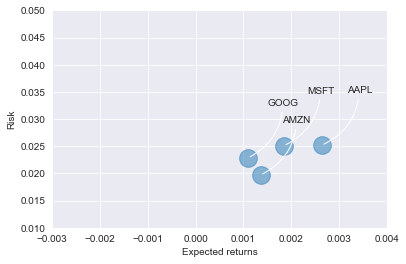

In [102]:
sns.set_style('darkgrid')
trets = rets.dropna()

area = np.pi*100

plt.scatter(trets.mean(), trets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.05])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(trets.columns, trets.mean(), trets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

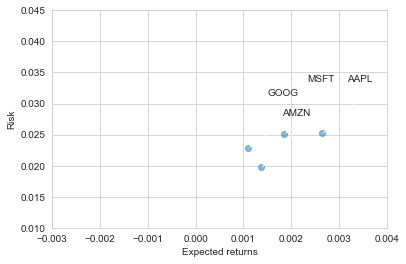

In [100]:
trets = rets.dropna()

area = np.pi*20

plt.scatter(trets.mean(), trets.std(),alpha = 0.5)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.045])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(trets.columns, trets.mean(), trets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

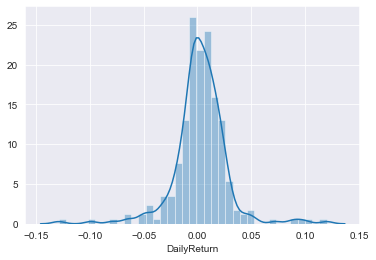

In [103]:
#Value at risk 
#for some confidence interval, our the capped risk value is called value at risk
sns.distplot(AAPL['DailyReturn'].dropna())

In [106]:
trets['AAPL'].quantile(0.05)
'''
this is the value at risk for apple stock. This means that 5% of the values are below -0.033 or -3.3%.
This can also be taken as saying with 95% confidence, I might at max lose (negative sign) 3.3% on a investment on 
apple stock.
or  with 5% confidence say that I might not at maximum lose 3.3% i.e, my loss could be more than that.
'''

-0.03308284476401163

In [120]:
'''
Monte Carlo Experiment, trying to figure stock price by multiple random guesses
'''
years=1
days=365*years
dt=1/days

mu=trets.mean()['GOOG']
sig=trets.std()['GOOG']

def montecarlo(start,days,mu,sig):
    price=np.zeros(days)
    price[0]=start
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sig * np.sqrt(dt))
        drift[x]= mu*dt
        price[x]=price[x-1]+price[x-1]*(drift[x]+shock[x])
    return price    

In [121]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close,10 MA,20 MA,50 MA
Date,,,,,,,,,
2019-05-23,1145.973022,1129.223999,1140.500000,1140.770020,1198900,1140.770020,NaN,NaN,NaN
2019-05-24,1149.765015,1131.660034,1147.359985,1133.469971,1112000,1133.469971,NaN,NaN,NaN
2019-05-28,1151.587036,1133.119995,1134.000000,1134.150024,1365000,1134.150024,NaN,NaN,NaN
2019-05-29,1129.099976,1108.219971,1127.520020,1116.459961,1538200,1116.459961,NaN,NaN,NaN
2019-05-30,1123.130005,1112.119995,1115.540039,1117.949951,951900,1117.949951,NaN,NaN,NaN


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

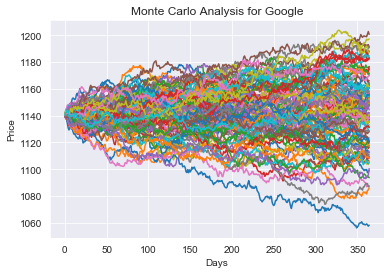

In [122]:
start=GOOG['Open'].iloc[0]

for _ in range(100):
    plt.plot(montecarlo(start,days,mu,sig))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')